In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


In [2]:
# Load the dataset
file_path = r"C:\Users\User\jupyter notebook\diabetes_data.csv"
df = pd.read_csv(file_path)


In [3]:
# Check data types and missing values
print(df.info())

# Check summary statistics
print(df.describe())

# Check the first few records
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [5]:
# Display basic info
print(df.head())
print(df.info())
print(df.describe())

    Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  29.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0     

In [6]:
#DATA CLEANING

initial_rows = df.shape[0]
print("Initial number of rows:", initial_rows)

#Handling duplicate & missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

#Display the count after removing duplicates and rows with missing values
cleaned_rows = df.shape[0]
print("Rows after cleaning:", cleaned_rows)

#Save the cleaned dataset to a new CSV file
cleaned_file_path = r"C:\Users\User\jupyter notebook\diabetes_data_new.csv"
df.to_csv(cleaned_file_path, index=False)

# Use the cleaned dataset for future analysis and modeling
cleaned_df = df.copy()

Initial number of rows: 70692
Rows after cleaning: 64020


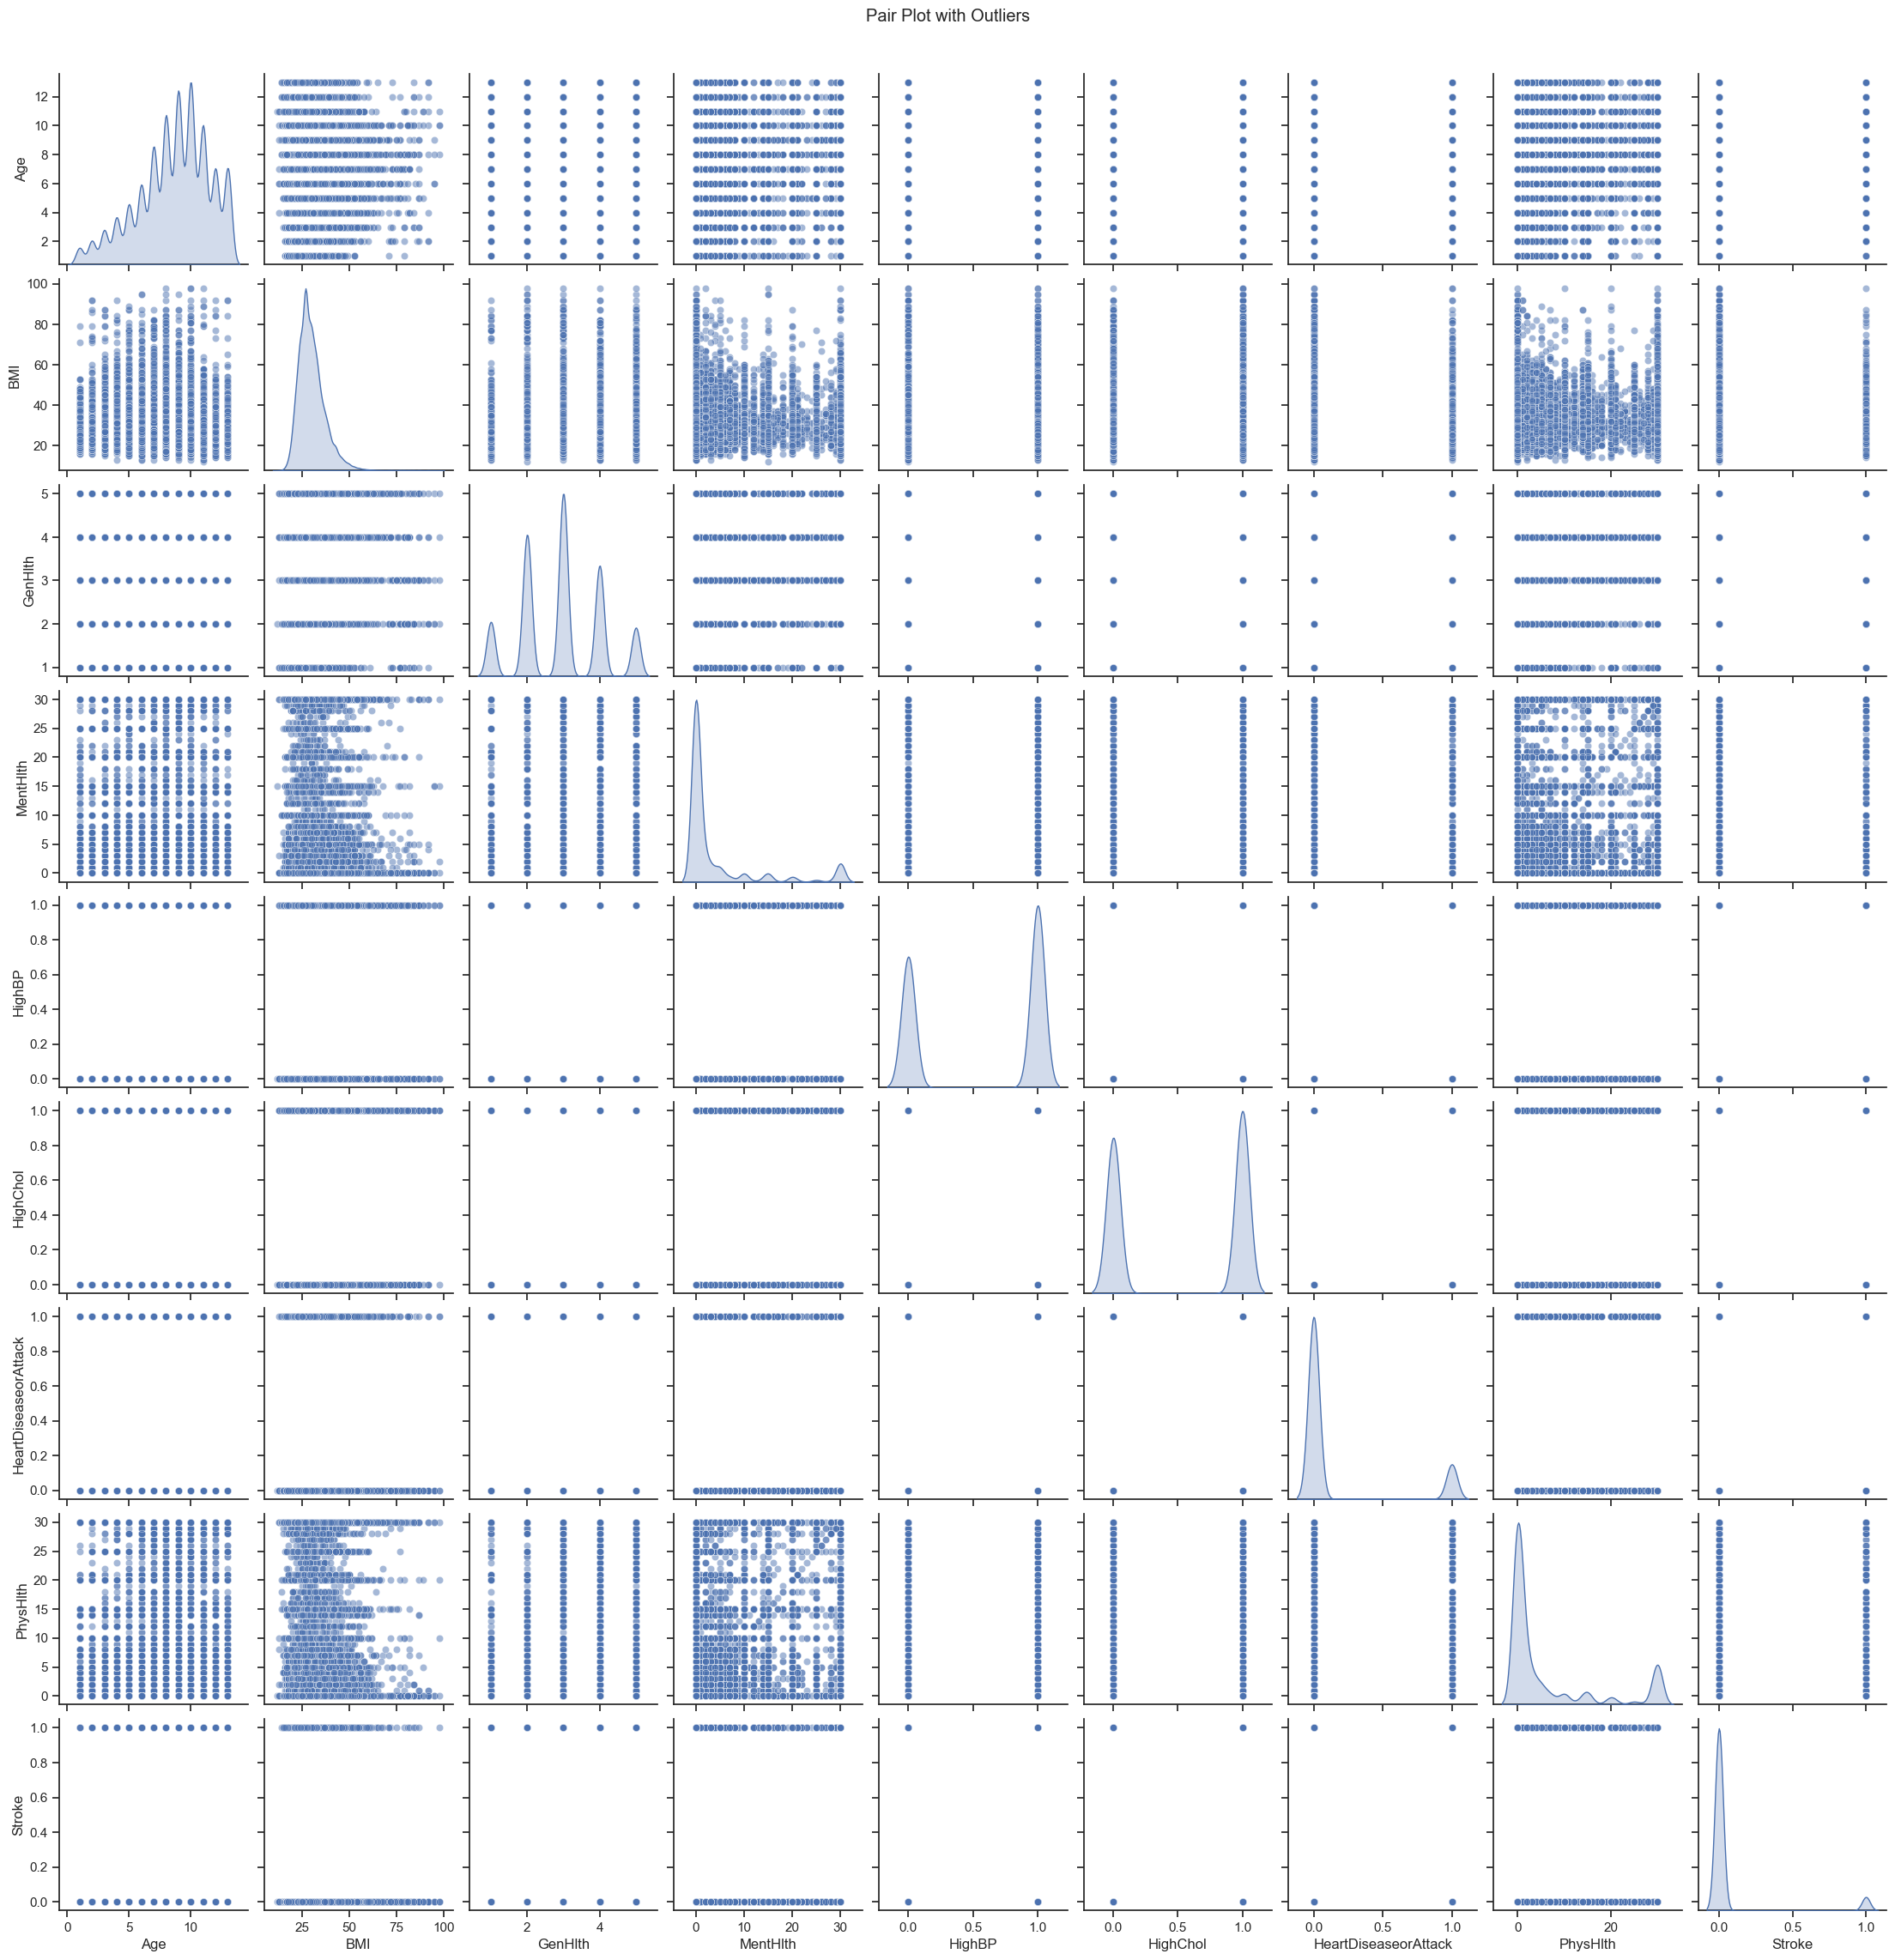

<Figure size 1200x600 with 0 Axes>

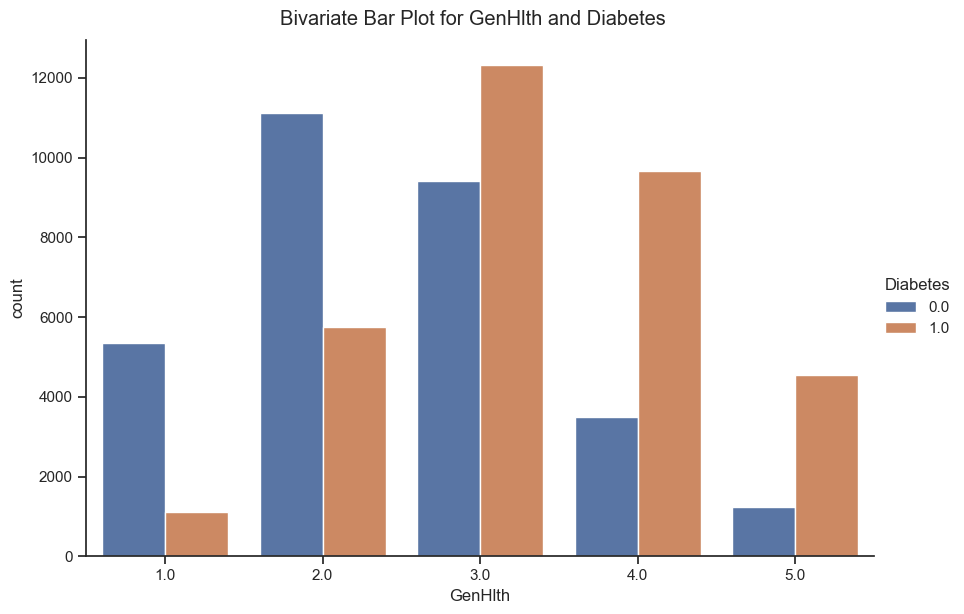

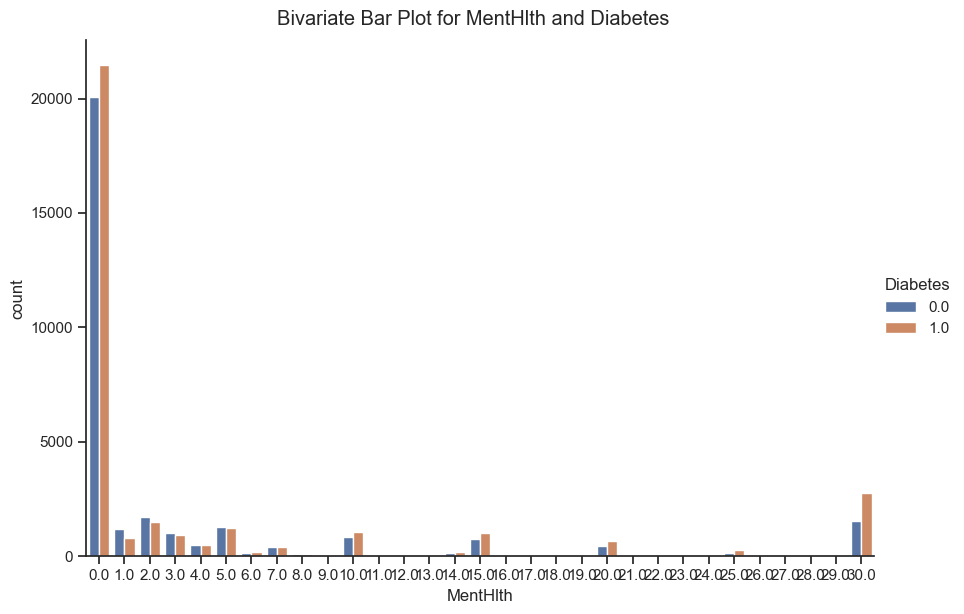

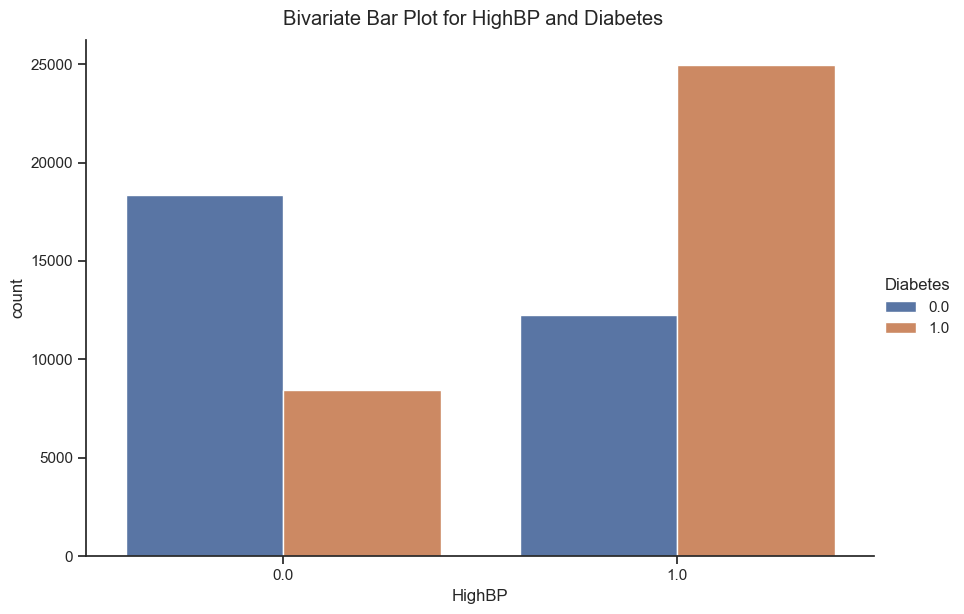

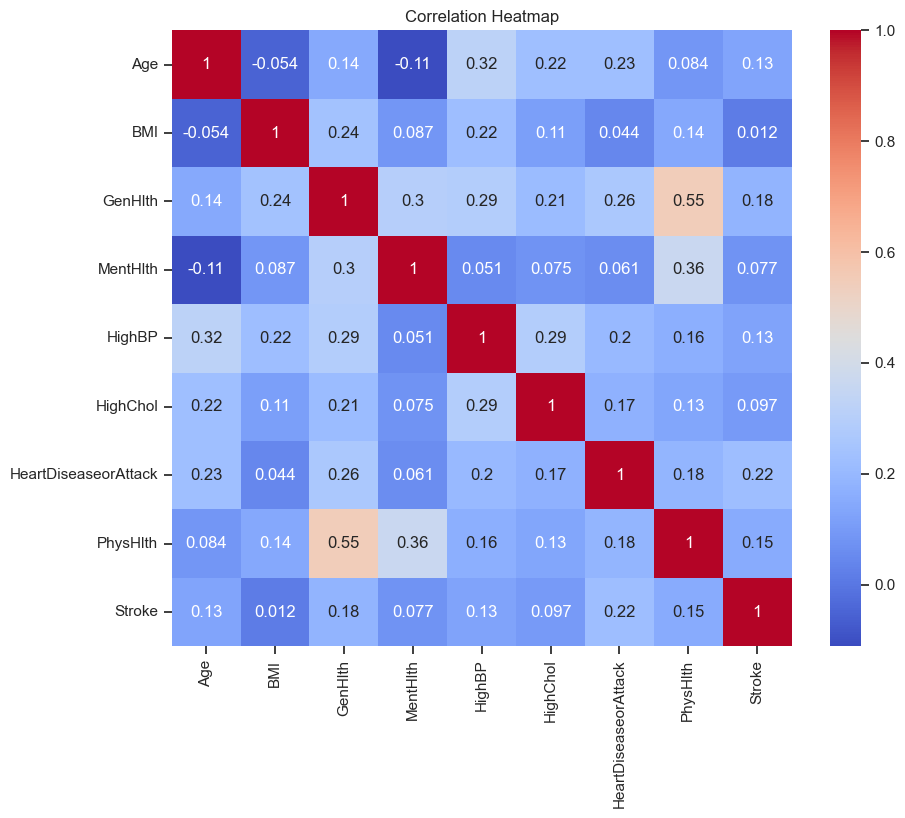

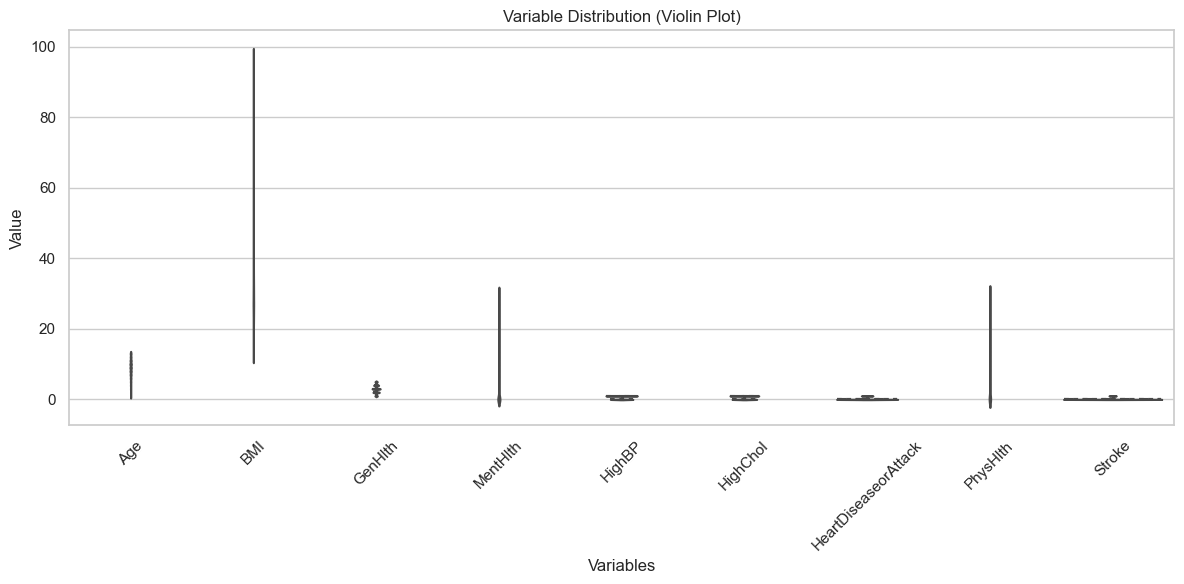

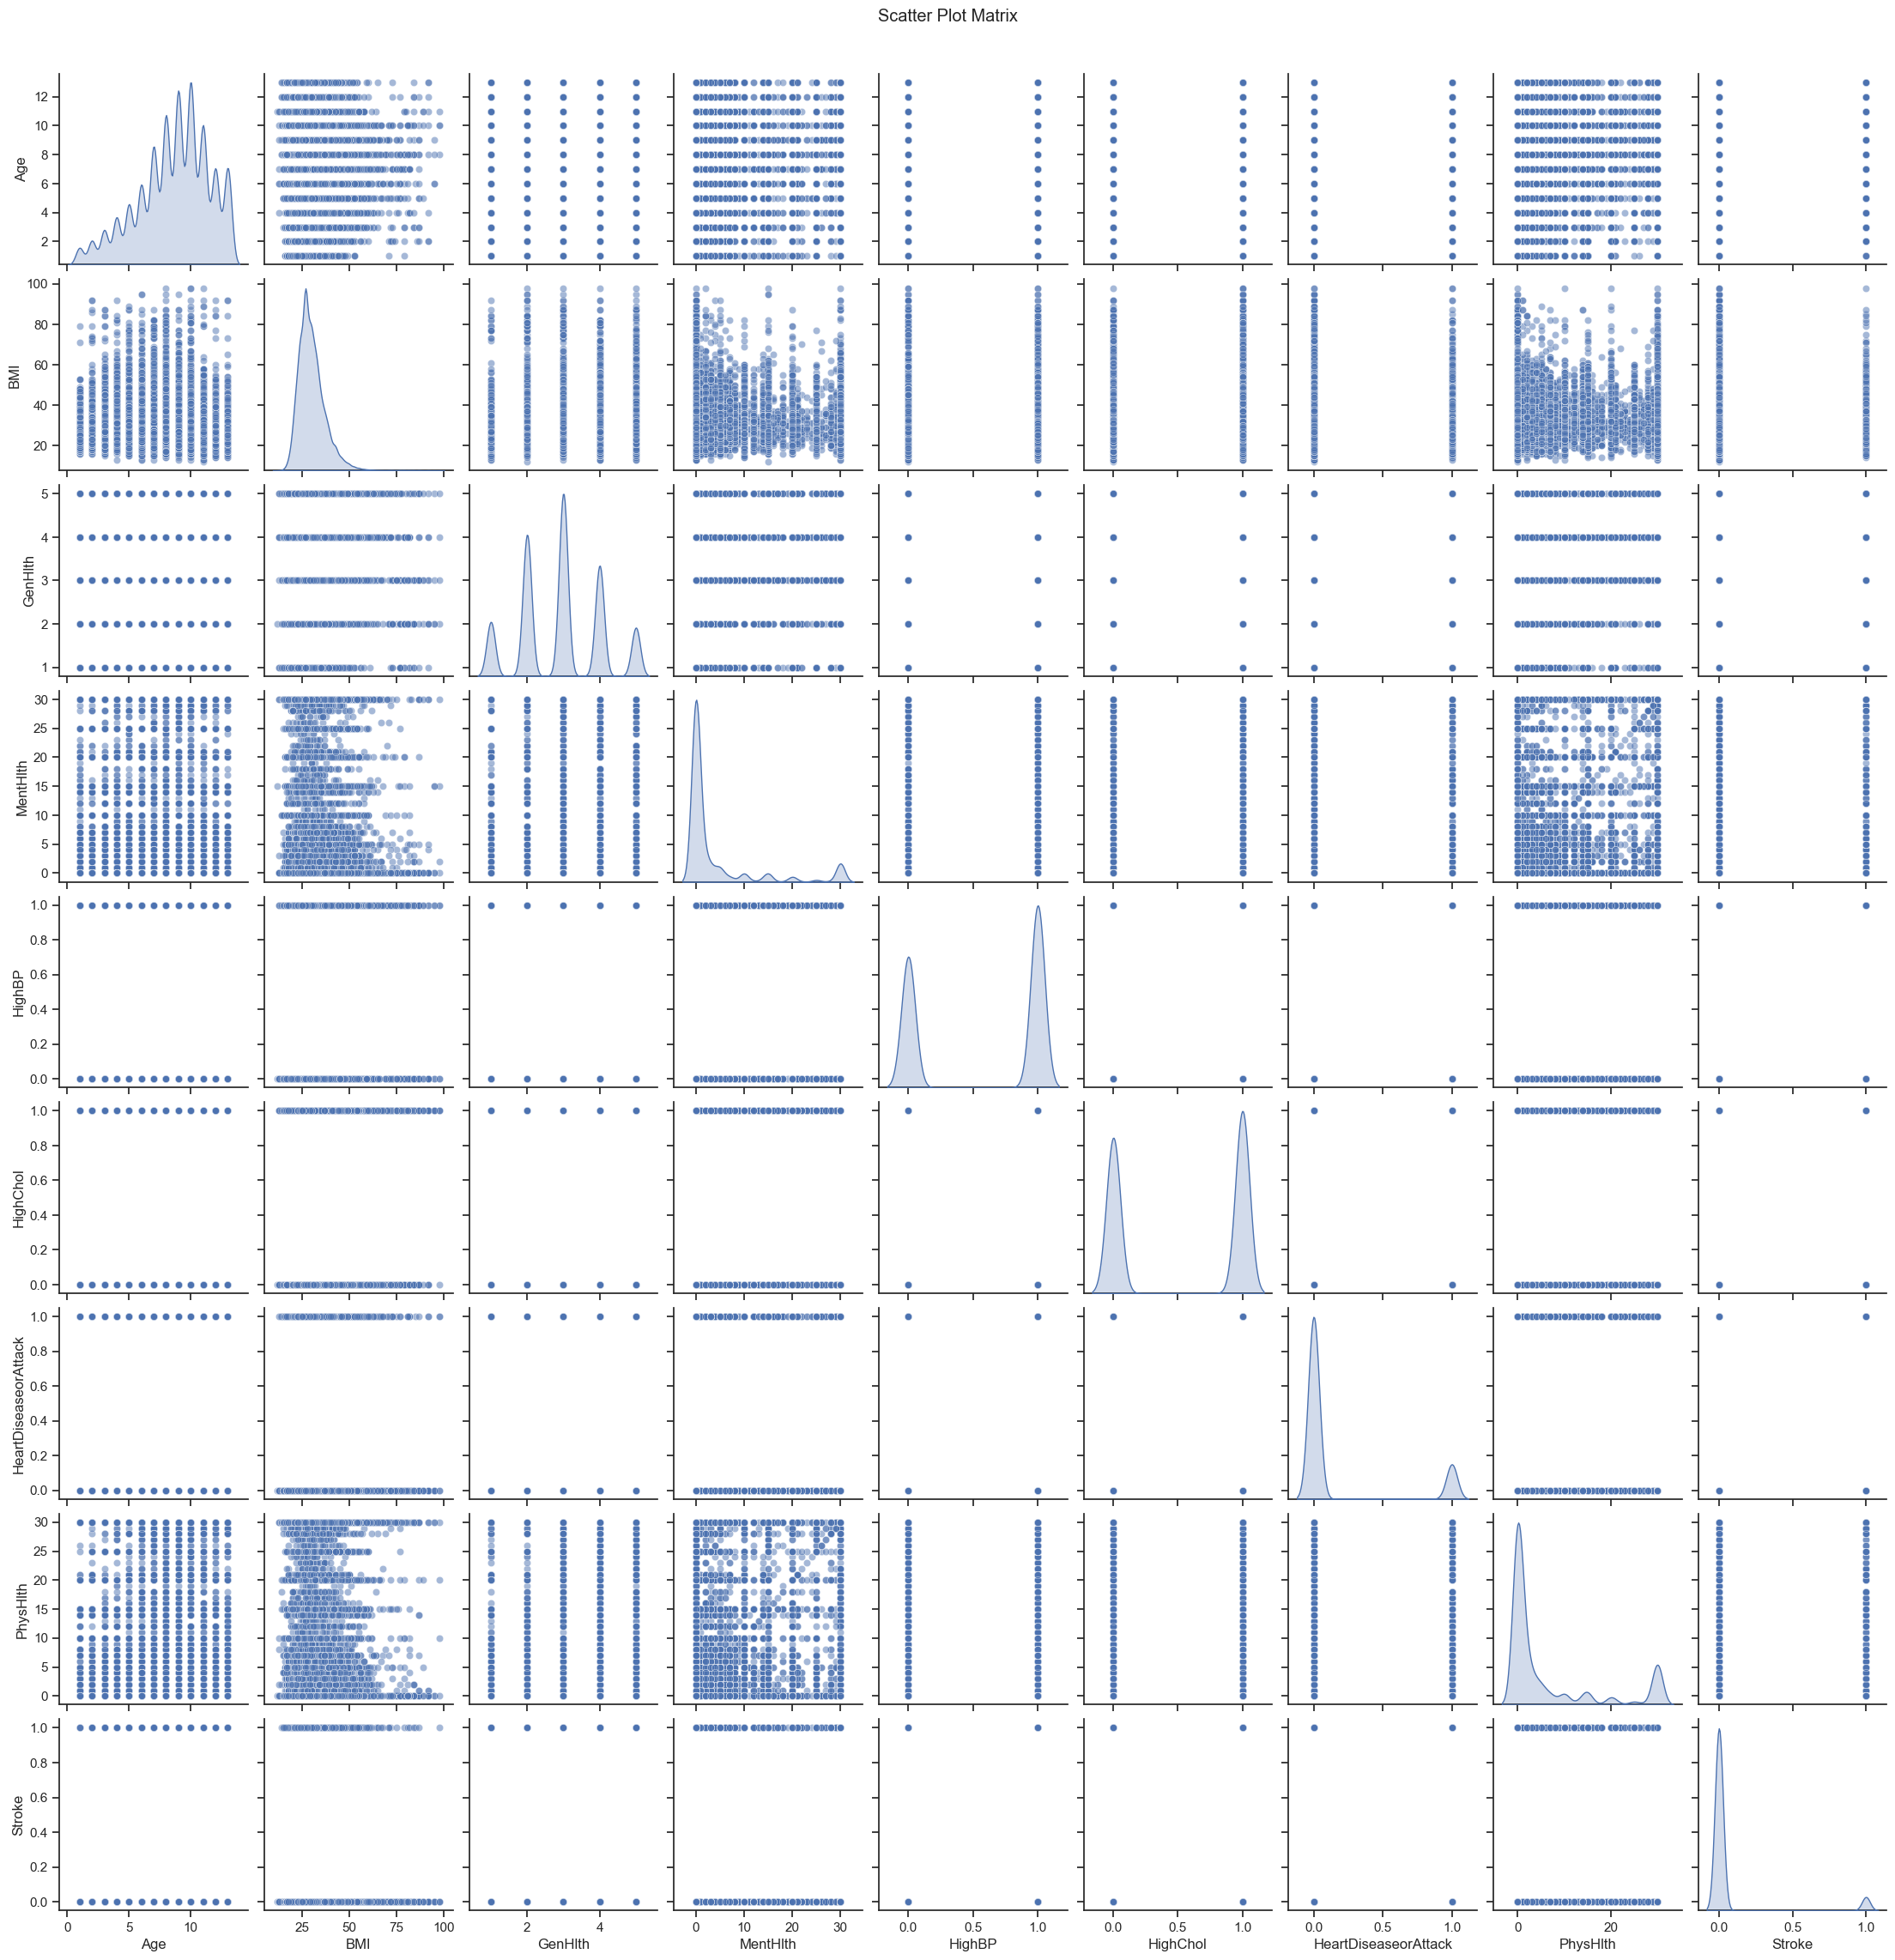

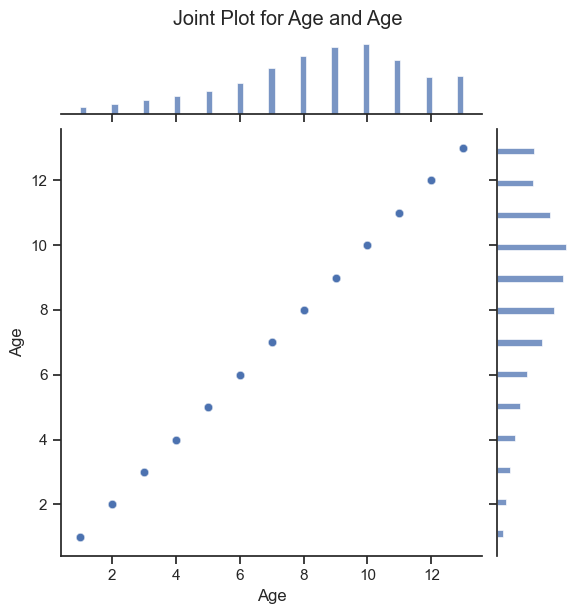

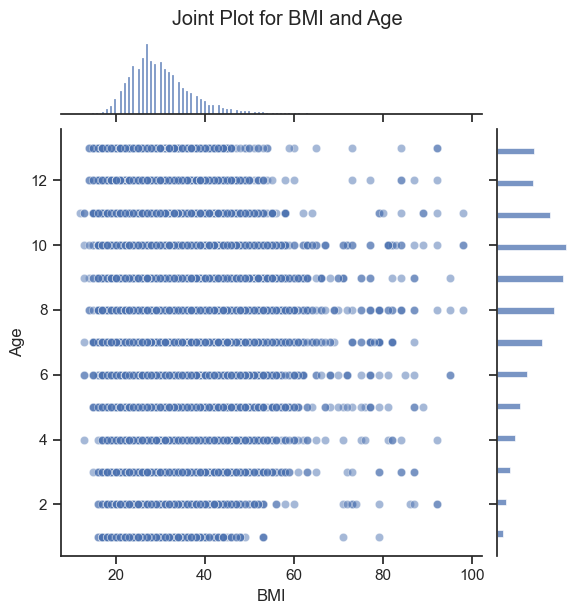

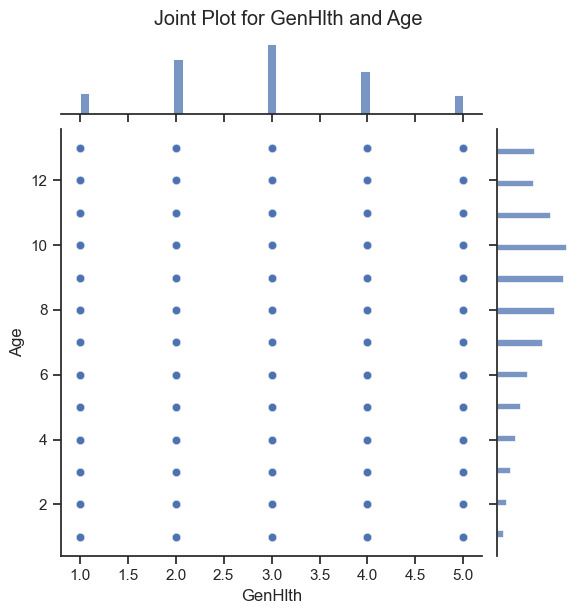

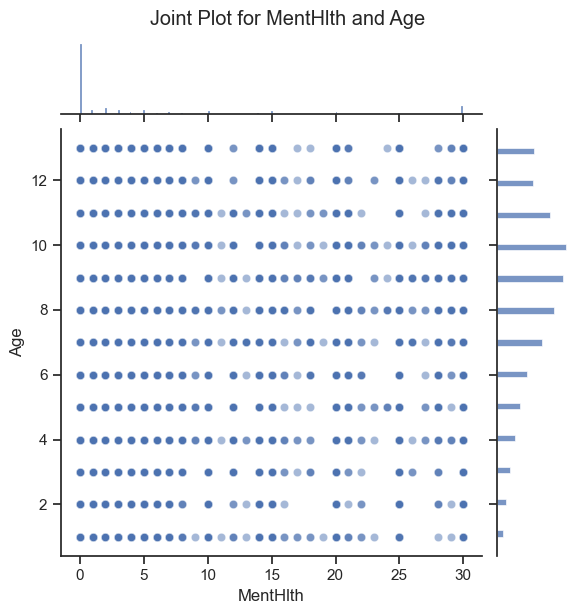

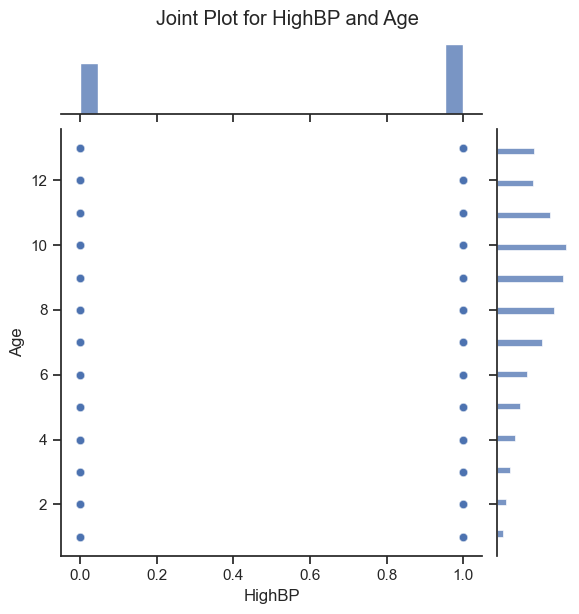

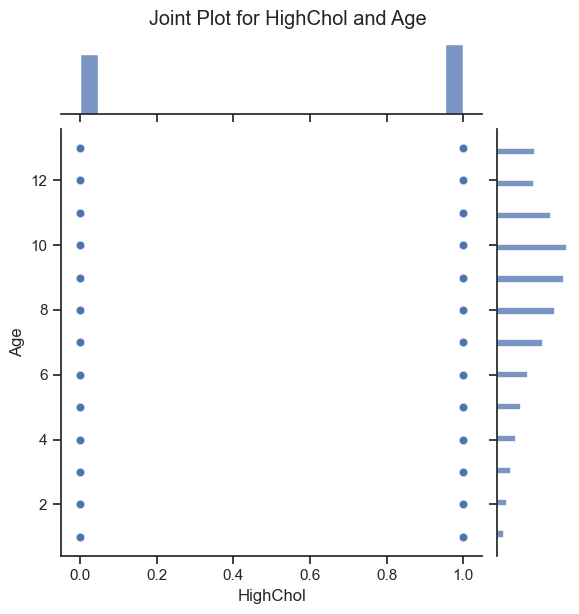

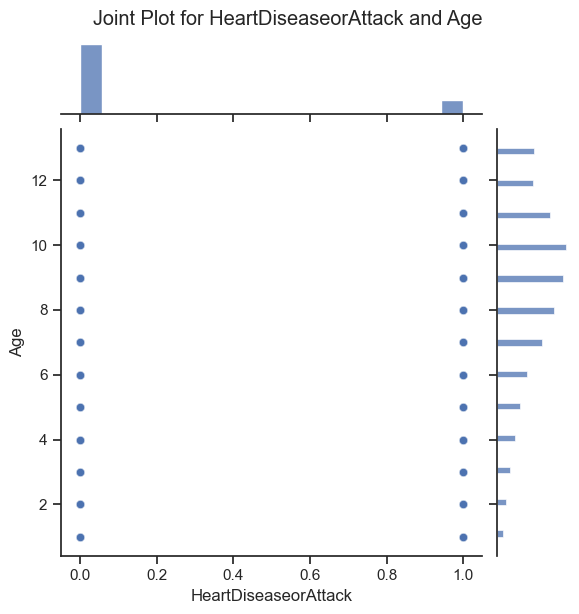

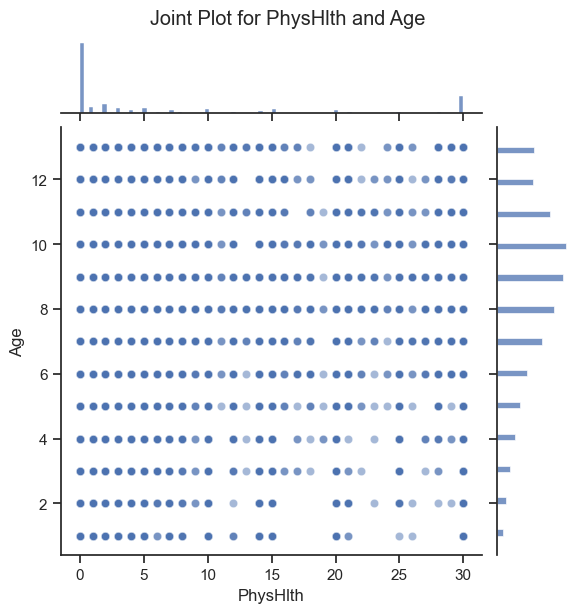

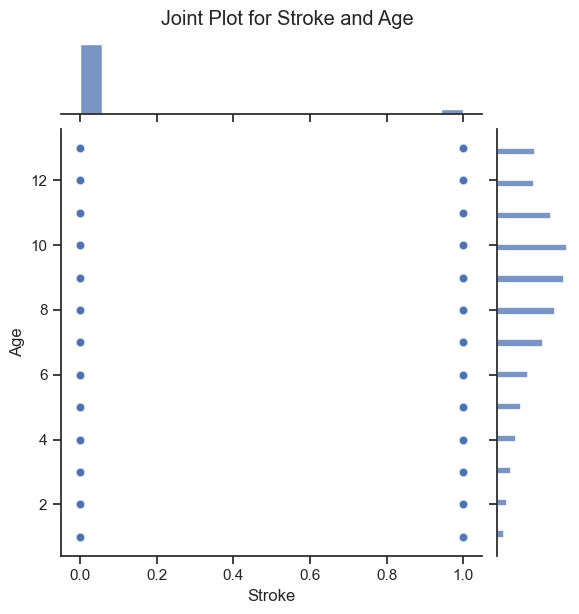

In [10]:
# Loading the cleaned dataset
cleaned_file_path = r"C:\Users\User\jupyter notebook\diabetes_data_new.csv"
df = pd.read_csv(cleaned_file_path)

# Pair Plots with Outliers
selected_features = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'HighBP', 
                     'HighChol', 'HeartDiseaseorAttack', 'PhysHlth', 'Stroke']
selected_df = df[selected_features]
sns.set(style='ticks')

# Create a scatterplot for each pair of variables
g_outliers = sns.pairplot(selected_df, diag_kind='kde', markers=['o', 's'], plot_kws={'alpha': 0.5})
g_outliers.fig.suptitle('Pair Plot with Outliers', y=1.02)
plt.show()

# Categorical Variable Analysis
selected_categorical = ['GenHlth', 'MentHlth', 'HighBP']
selected_cat_df = df[selected_categorical + ['Diabetes']]
plt.figure(figsize=(12, 6))
for cat_var in selected_categorical:
    g = sns.catplot(data=selected_cat_df, x=cat_var, hue='Diabetes', kind='count', height=6, aspect=1.5)
    g.fig.suptitle(f'Bivariate Bar Plot for {cat_var} and Diabetes', y=1.02)
    plt.show()

# Correlation Analysis
correlation_matrix = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualizations
melted_df = selected_df.melt(value_vars=selected_features)
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.violinplot(x='variable', y='value', data=melted_df, inner='quart')
plt.xticks(rotation=45)
plt.title('Variable Distribution (Violin Plot)')
plt.xlabel('Variables')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

sns.set(style='ticks')
g_scatter_matrix = sns.pairplot(selected_df, diag_kind='kde', markers=['o', 's'], plot_kws={'alpha': 0.5})
g_scatter_matrix.fig.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

for feature in selected_features:
    g_joint = sns.jointplot(data=selected_df, x=feature, y='Age', kind='scatter', markers=['o', 's'], alpha=0.5)
    g_joint.fig.suptitle(f'Joint Plot for {feature} and Age', y=1.02)
    plt.show()


In [11]:
#Checking Unique Values in Categorical Columns
for cat_var in selected_categorical:
    unique_values = df[cat_var].unique()
    print(f'Unique values in {cat_var}: {unique_values}')

Unique values in GenHlth: [3. 1. 2. 4. 5.]
Unique values in MentHlth: [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
Unique values in HighBP: [1. 0.]


In [12]:
from scipy import stats

cleaned_file_path = r"C:\Users\User\jupyter notebook\diabetes_data_new.csv"
df = pd.read_csv(cleaned_file_path)

# Create a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

# Detect outliers in 'Age' and 'BMI' columns
outliers_age = detect_outliers_zscore(df['Age'])
outliers_bmi = detect_outliers_zscore(df['BMI'])

# Mark potential outliers in the DataFrame
df['Outlier_Age'] = outliers_age
df['Outlier_BMI'] = outliers_bmi

# Print the count of potential outliers
print("Count of Potential Outliers in 'Age':", df['Outlier_Age'].sum())
print("Count of Potential Outliers in 'BMI':", df['Outlier_BMI'].sum())

Count of Potential Outliers in 'Age': 0
Count of Potential Outliers in 'BMI': 690


In [14]:
pip install category_encoders


     ---------------------------------------- 81.9/81.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load the cleaned dataset
cleaned_file_path = r"C:\Users\User\jupyter notebook\diabetes_data_new.csv"
df = pd.read_csv(cleaned_file_path)

# Interaction Terms
df['Age_BMI_interaction'] = df['Age'] * df['BMI']

# Binning
df['Age_bins'] = pd.cut(df['Age'], bins=5, labels=False)

# Logarithmic Transformation
df['HighChol_log'] = np.log(df['HighChol'] + 1)  # Adding 1 to avoid log(0)

# Feature Scaling
scaled_features = StandardScaler().fit_transform(df[['GenHlth', 'PhysHlth']])
df[['GenHlth_scaled', 'PhysHlth_scaled']] = scaled_features

# Feature Crosses
df['Sex_Smoker_cross'] = df['Sex'].astype(str) + '_' + df['Smoker'].astype(str)

# Print the first few rows of the updated DataFrame
print(df.head())

    Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4   8.0  0.0       0.0        1.0  29.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  DiffWalk  Stroke  HighBP  Diabetes  \
0           1.0     0.0      1.0  ...       0.0     0.0     1.0       0.0   
1           0.0     1.0      0.0  ...       0.0     1.0     1.0       0.0   
2           1.0     1.0      1.0  ...       0.0     0.0     0.0       0.0   
3           1.0     1.0      1.0  ...       0.0     0.0     1.0       0.0   
4           1.0     1.0      1.0  ...       0.0     0.0     0.0       0.0   

   Age_BMI_interaction  Age_bins  HighChol_log  GenHlth_scaled  \
0                104.0         1

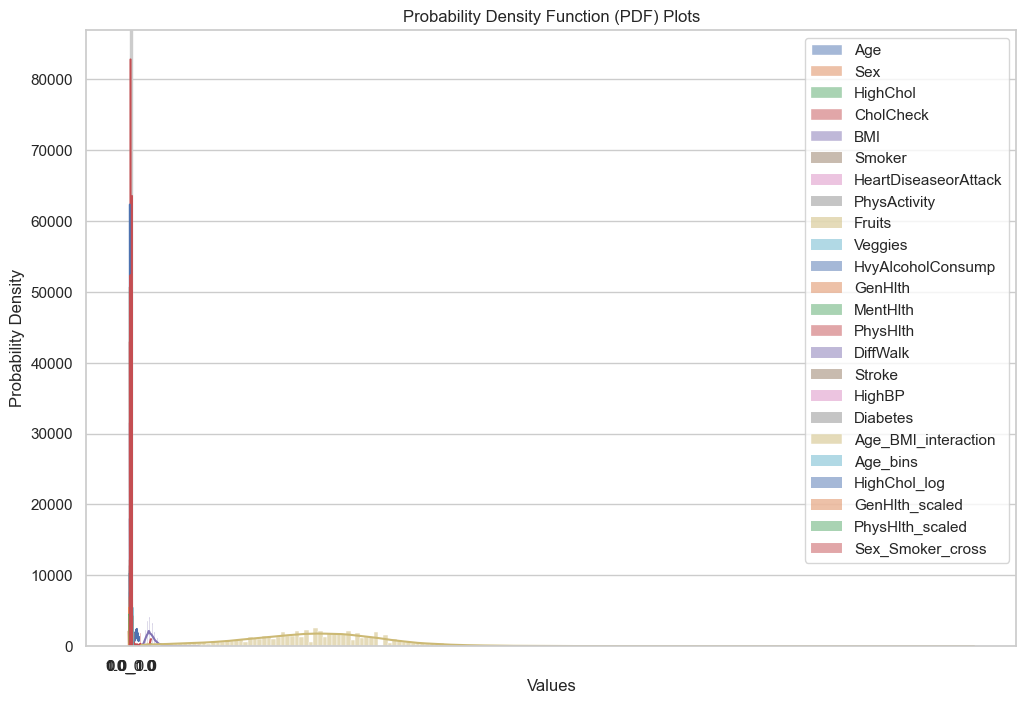

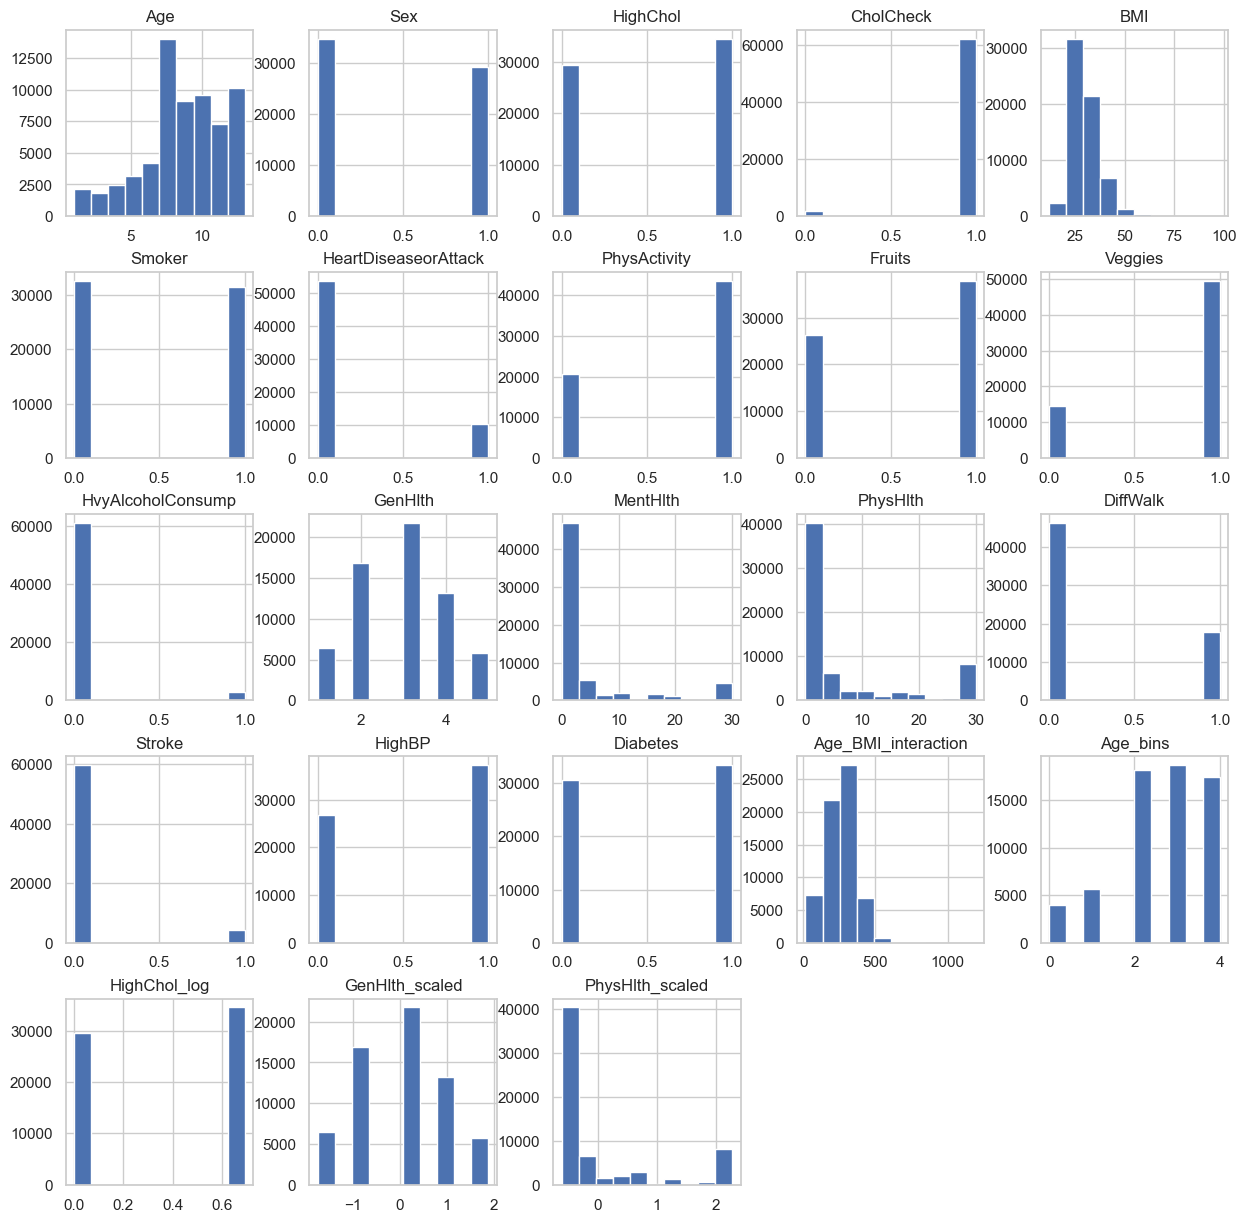

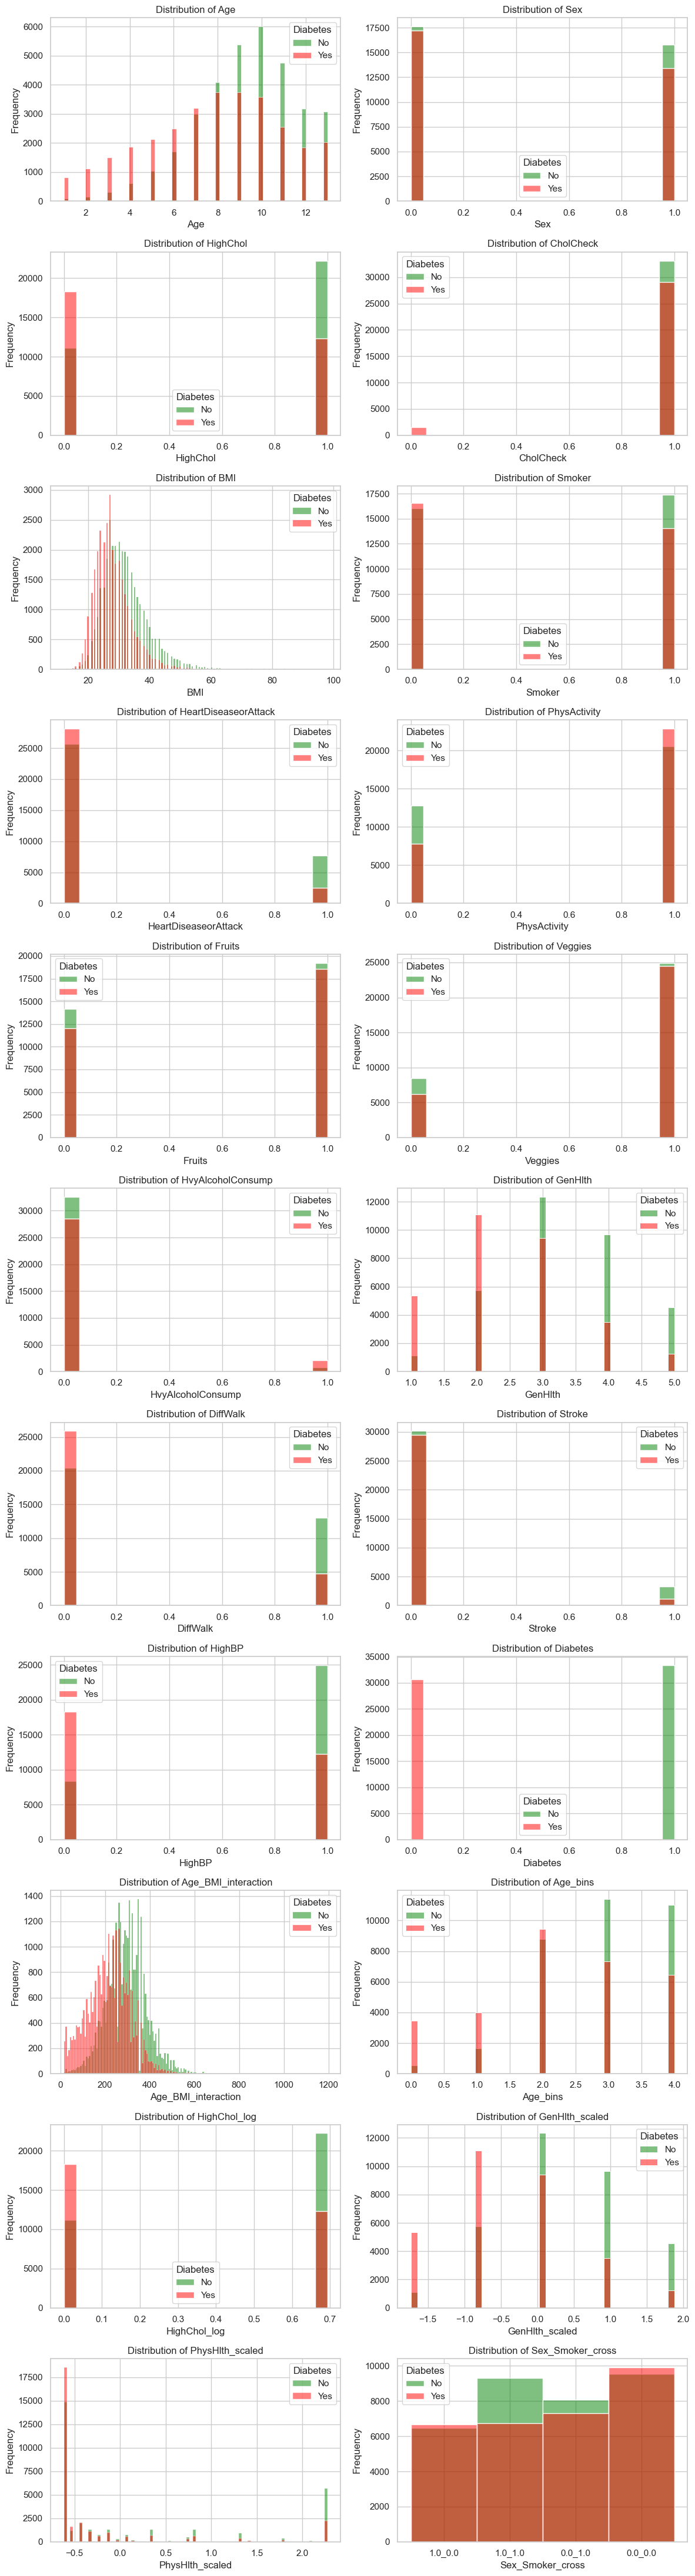

In [44]:
# Probability Density Function (PDF) plot.
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
for column in df.columns:
    sns.histplot(data=df, x=column, kde=True, label=column)

plt.xlabel("Values")
plt.ylabel("Probability Density")
plt.title("Probability Density Function (PDF) Plots")
plt.legend()
plt.show()

# Distribution of each feature
df.hist(figsize=(15, 15))
plt.show()

sns.set(style="whitegrid")

columns_to_plot = [col for col in df.columns if col not in ['MentHlth', 'PhysHlth']]

num_rows = len(columns_to_plot) // 2 + (len(columns_to_plot) % 2 > 0)
fig, ax = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows)) 

class_colors = {0: 'red', 1: 'green'}

for i, col in enumerate(columns_to_plot):
    row_idx = i // 2
    col_idx = i % 2
    
    if col in ['MentHlth', 'PhysHlth']:
        sns.kdeplot(data=df, x=col, hue='Diabetes', palette=class_colors, ax=ax[row_idx, col_idx])
    else:
        sns.histplot(data=df, x=col, hue='Diabetes', palette=class_colors, ax=ax[row_idx, col_idx])

    ax[row_idx, col_idx].set_title(f"Distribution of {col}")
    ax[row_idx, col_idx].set_xlabel(col)
    ax[row_idx, col_idx].set_ylabel("Frequency")
    ax[row_idx, col_idx].legend(title='Diabetes', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


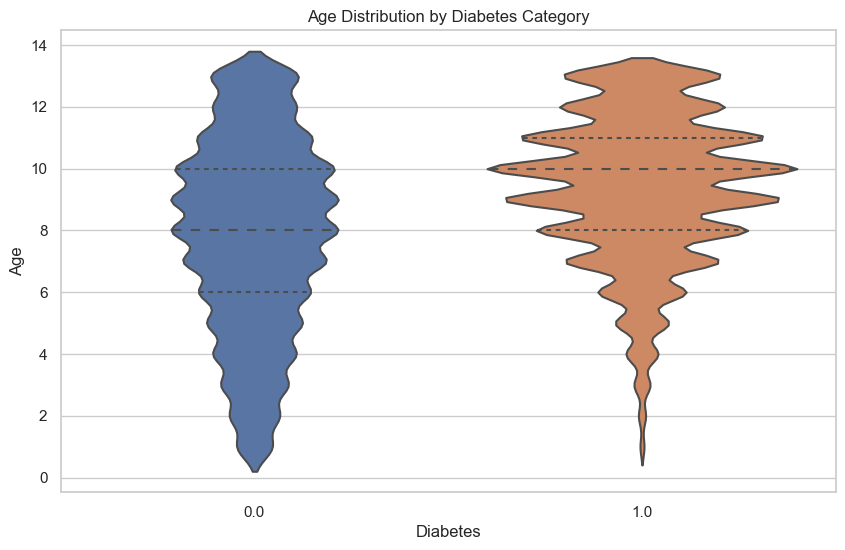

In [45]:
#Violin plot age vs diabetes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.violinplot(x="Diabetes", y="Age", data=df, split=True, inner="quart")
plt.title("Age Distribution by Diabetes Category")
plt.xlabel("Diabetes")
plt.ylabel("Age")
plt.show()

<Figure size 1200x800 with 0 Axes>

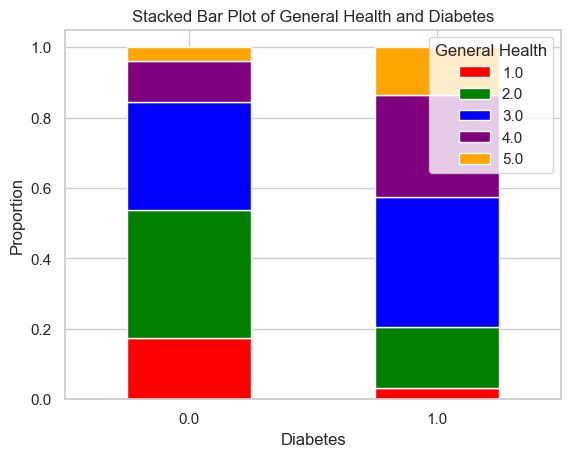

In [47]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a stacked bar plot with normalized counts
stacked_data = df.groupby(['Diabetes', 'GenHlth'])['Age'].count().unstack().fillna(0)
stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)  # Normalize the counts

stacked_data.plot(kind='bar', stacked=True, color=['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'pink'])
plt.title("Stacked Bar Plot of General Health and Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title='General Health')
plt.show()


In [48]:
pip install dask


Note: you may need to restart the kernel to use updated packages.


<Figure size 1600x1200 with 0 Axes>

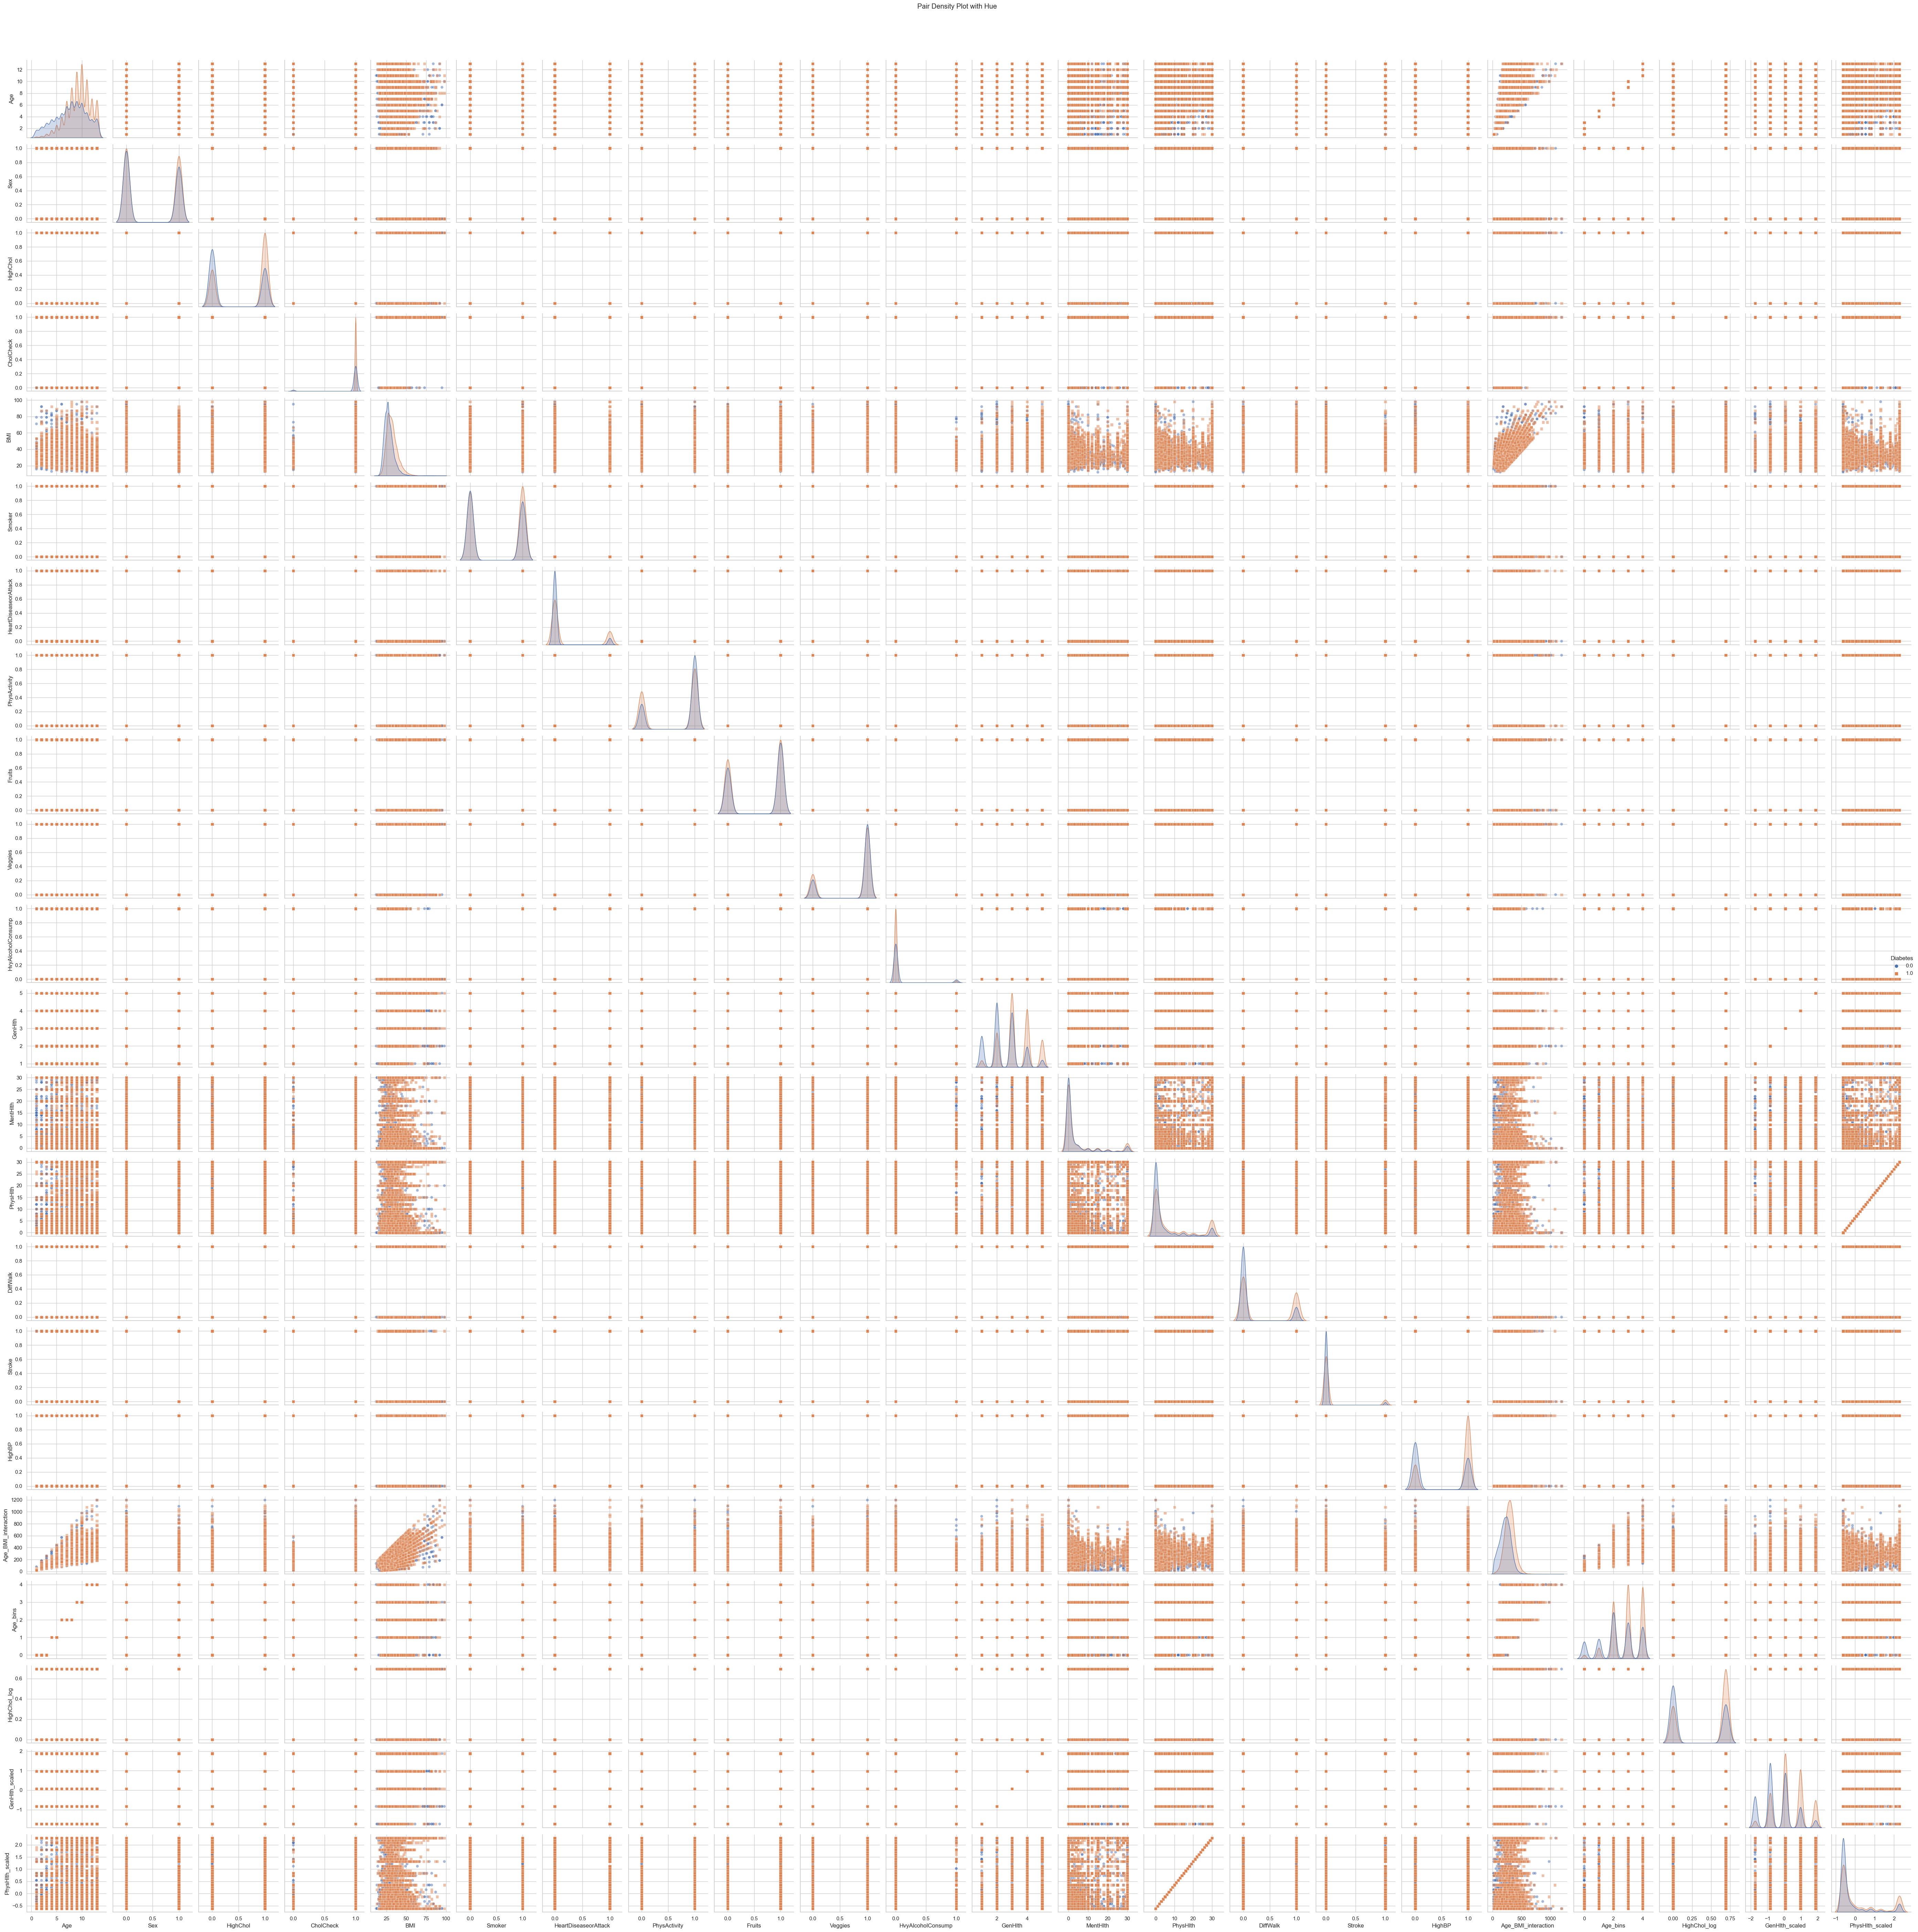

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and DPI (dots per inch)
plt.figure(figsize=(16, 12), dpi=100)
sns.set(style="whitegrid")

# Create a pair density plot
sns.pairplot(df, hue="Diabetes", diag_kind="kde", markers=["o", "s"], plot_kws={"alpha": 0.5})

# Add a title and adjust layout
plt.suptitle("Pair Density Plot with Hue", y=1.02)
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1200x2000 with 0 Axes>

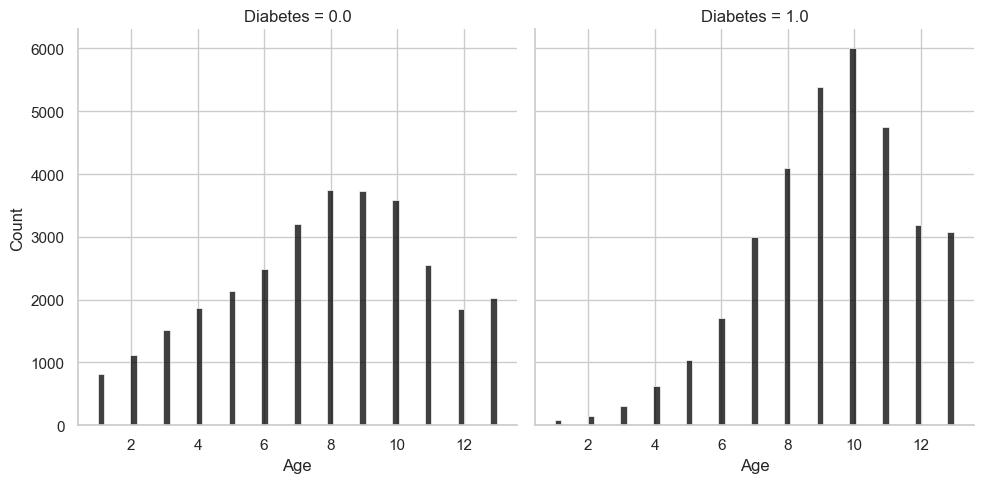

In [53]:
plt.figure(figsize=(12,20))
sns.displot(data=df,col='Diabetes',x='Age',color='black')

In [54]:
# Calculate skewness for each feature
skewness = df.skew()

# Display skewness values
print("Skewness for each feature:")
print(skewness)


Skewness for each feature:
Age                    -0.545112
Sex                     0.176760
HighChol               -0.158702
CholCheck              -5.861619
BMI                     1.669602
Smoker                  0.037183
HeartDiseaseorAttack    1.855403
PhysActivity           -0.763730
Fruits                 -0.369612
Veggies                -1.293887
HvyAlcoholConsump       4.315880
GenHlth                 0.108853
MentHlth                2.224306
PhysHlth                1.513020
DiffWalk                0.996595
Stroke                  3.416217
HighBP                 -0.331492
Diabetes               -0.086807
Age_BMI_interaction     0.227230
Age_bins               -0.553068
HighChol_log           -0.158702
GenHlth_scaled          0.108853
PhysHlth_scaled         1.513020
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_18424\2144753277.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


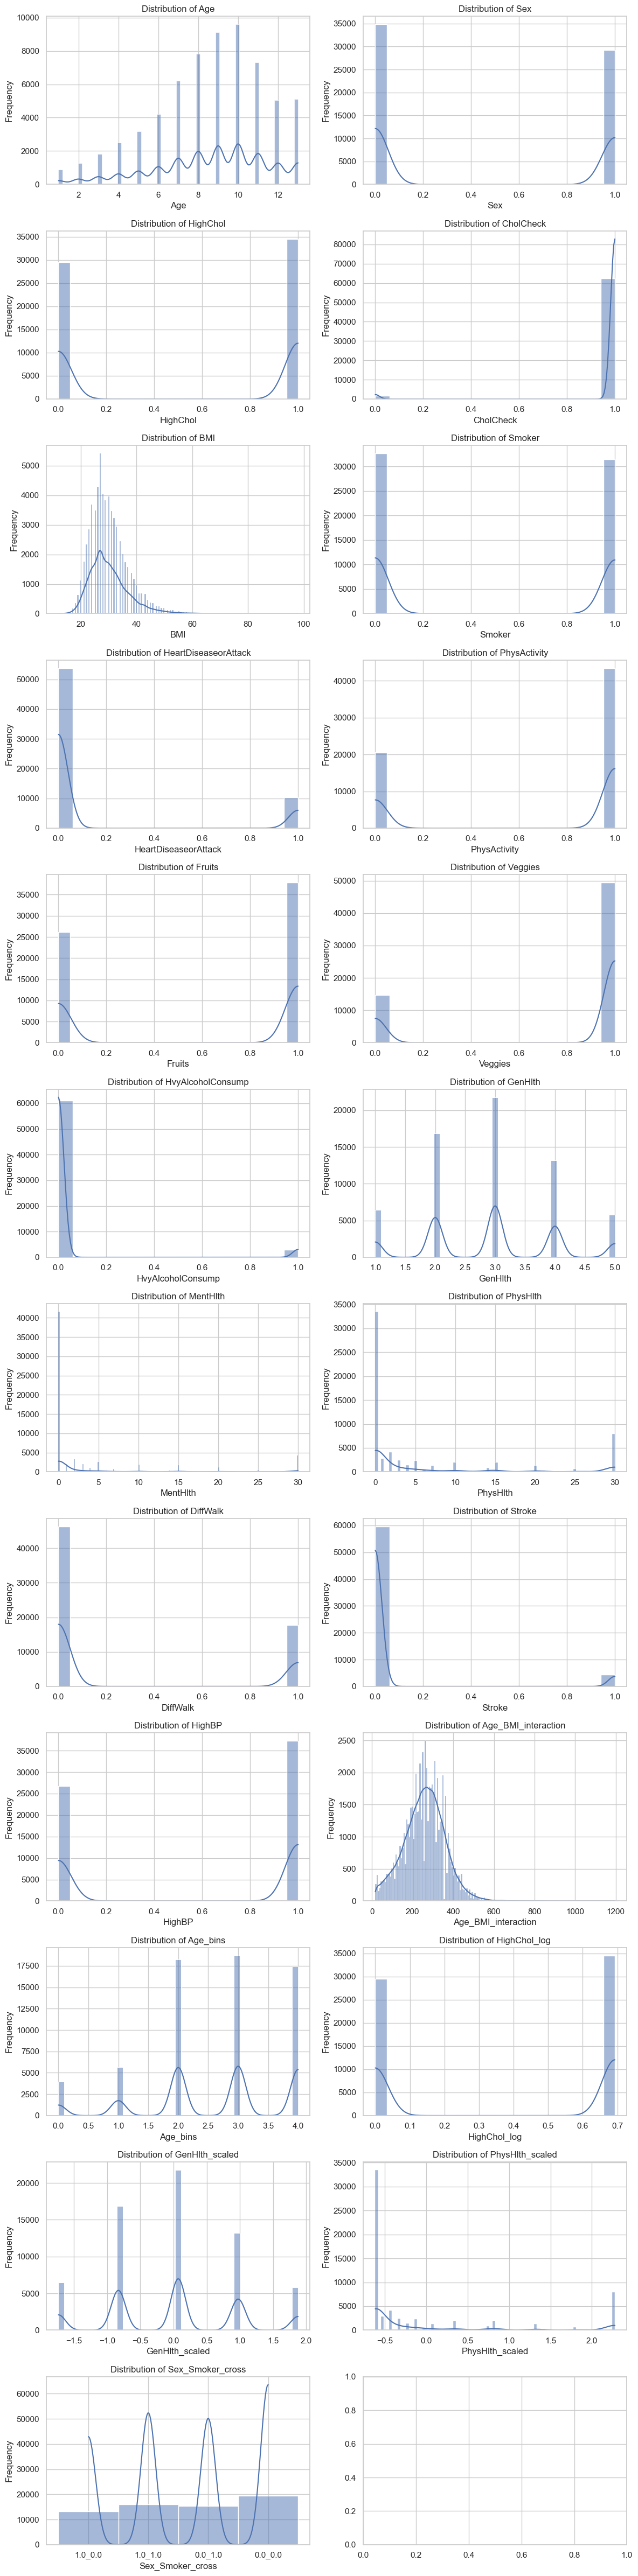

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Define the columns to plot
columns_to_plot = df.columns.drop(['Diabetes'])  # Exclude the target variable

# Create subplots
num_rows = len(columns_to_plot) // 2 + (len(columns_to_plot) % 2 > 0)
fig, ax = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows)) 

# Plot each column's distribution
for i, col in enumerate(columns_to_plot):
    row_idx = i // 2
    col_idx = i % 2
    
    sns.histplot(data=df, x=col, kde=True, ax=ax[row_idx, col_idx])
    ax[row_idx, col_idx].set_title(f"Distribution of {col}")
    ax[row_idx, col_idx].set_xlabel(col)
    ax[row_idx, col_idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

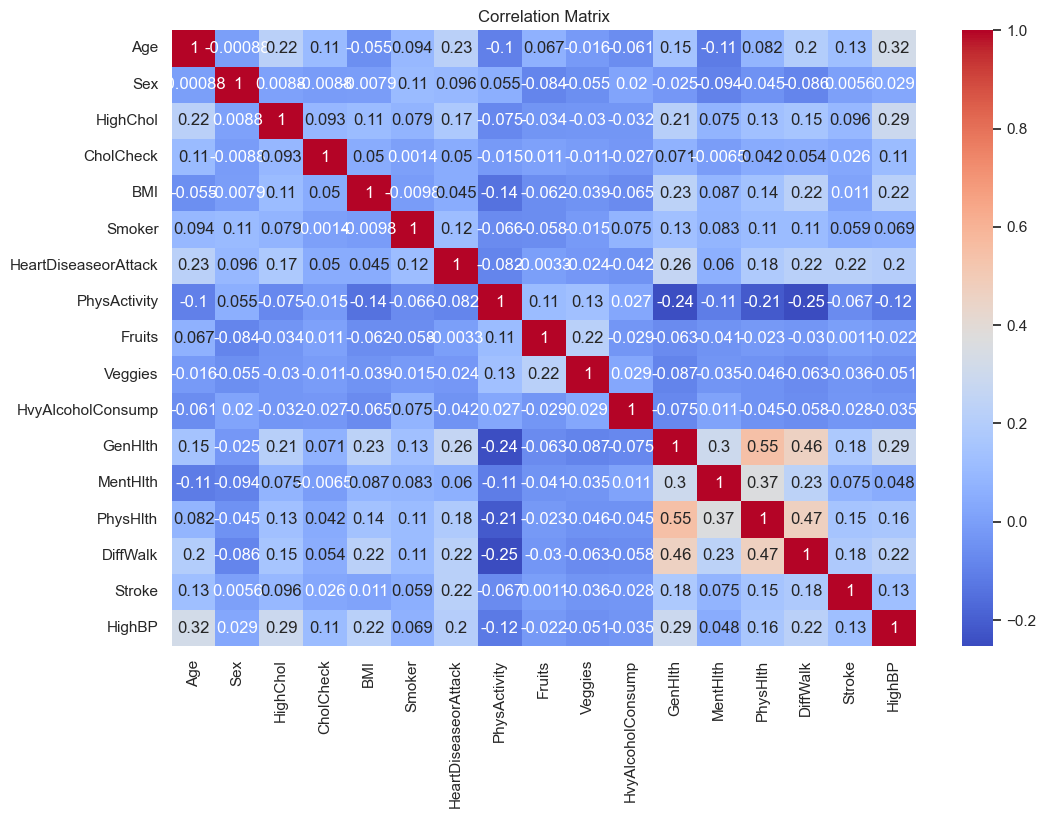

Feature ranking:
1. BMI (0.2171)
2. Age (0.1556)
3. GenHlth (0.1034)
4. PhysHlth (0.0945)
5. HighBP (0.0793)
6. MentHlth (0.0719)
7. HighChol (0.0392)
8. Fruits (0.0353)
9. Smoker (0.0351)
10. Sex (0.0325)
11. PhysActivity (0.0288)
12. Veggies (0.0277)
13. DiffWalk (0.0277)
14. HeartDiseaseorAttack (0.0201)
15. Stroke (0.0127)
16. HvyAlcoholConsump (0.0114)
17. CholCheck (0.0078)


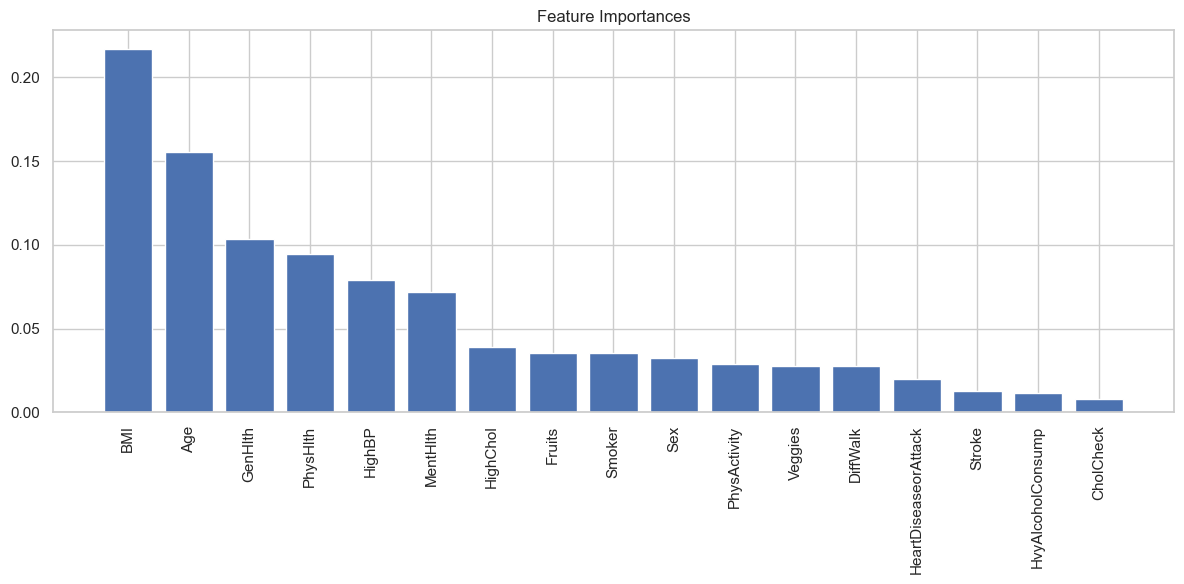

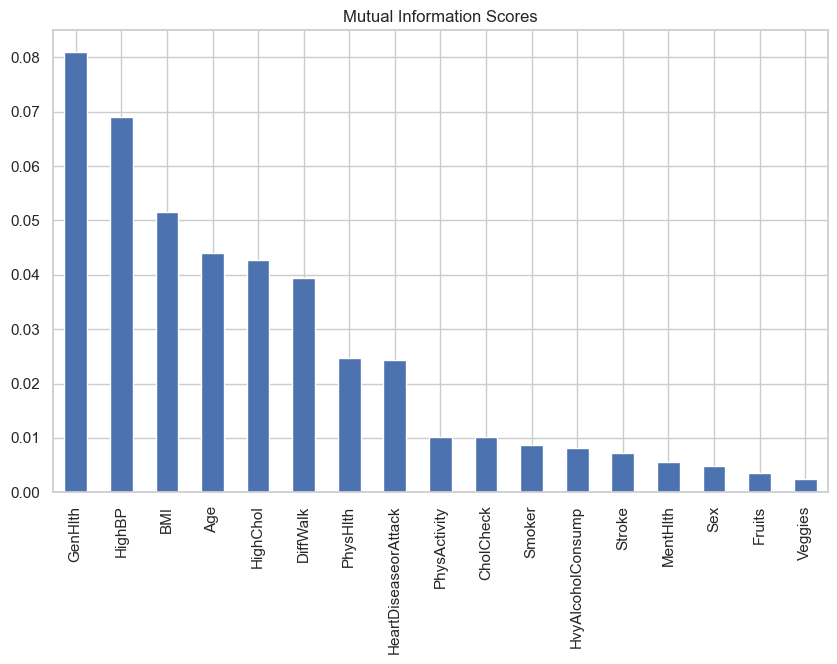

Selected features from L1 regularization: Index(['Age', 'HighChol', 'BMI', 'GenHlth', 'HighBP'], dtype='object')


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the cleaned dataset
cleaned_file_path = r"C:\Users\User\jupyter notebook\diabetes_data_new.csv"
df = pd.read_csv(cleaned_file_path)

# Exclude columns for non-numeric features from scaling
non_numeric_columns = ['Sex_Smoker_cross', 'Age_bins']

# Create a list of columns to scale
columns_to_scale = [col for col in df.columns if col not in non_numeric_columns + ['Diabetes']]

# Splitting the data into features (X) and target variable (y)
X = df.drop('Diabetes', axis=1)  # Keep 'Diabetes' in the features dataset
y = df['Diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardize features for the selected columns only
X_train_scaled_copy = X_train.copy()
X_train_scaled_copy[columns_to_scale] = scaler.fit_transform(X_train_scaled_copy[columns_to_scale])
X_test_scaled_copy = X_test.copy()
X_test_scaled_copy[columns_to_scale] = scaler.transform(X_test_scaled_copy[columns_to_scale])

# Correlation Analysis
correlation_matrix = X_train_scaled_copy.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Recursive Feature Elimination (RFE)
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train_scaled_copy, y_train)
selected_features_rfe = X_train.columns[rfe.support_]

# Tree-based Feature Importance
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled_copy, y_train)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Feature ranking
print("Feature ranking:")
for i, index in enumerate(indices):
    print(f"{i+1}. {X_train.columns[index]} ({importances[index]:.4f})")

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_scaled_copy.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled_copy.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.tight_layout()
plt.show()

# Mutual Information
mi_scores = mutual_info_classif(X_train_scaled_copy, y_train, discrete_features='auto')
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()

# L1 Lasso Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
sfm = SelectFromModel(model_l1, threshold=0.25)
sfm.fit(X_train_scaled_copy, y_train)
selected_features_l1 = X_train.columns[sfm.get_support()]

print("Selected features from L1 regularization:", selected_features_l1)


In [61]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model: Logistic Regression
Best Parameters: {'C': 0.1}
Accuracy: 0.7362, Precision: 0.7401, Recall: 0.7699, F1-Score: 0.7547


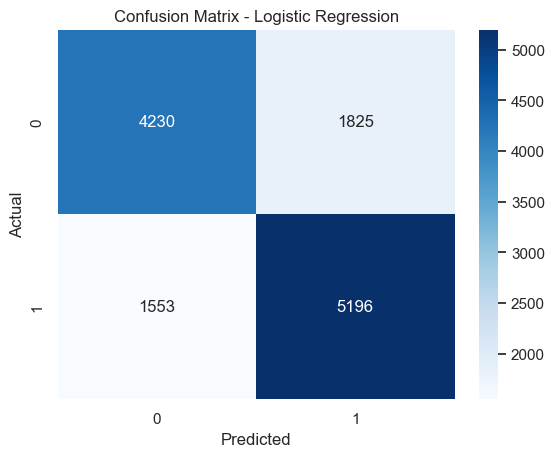

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.73      0.70      0.71      6055
    Diabetes       0.74      0.77      0.75      6749

    accuracy                           0.74     12804
   macro avg       0.74      0.73      0.73     12804
weighted avg       0.74      0.74      0.74     12804

Model: Decision Tree
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.7273, Precision: 0.7248, Recall: 0.7780, F1-Score: 0.7505


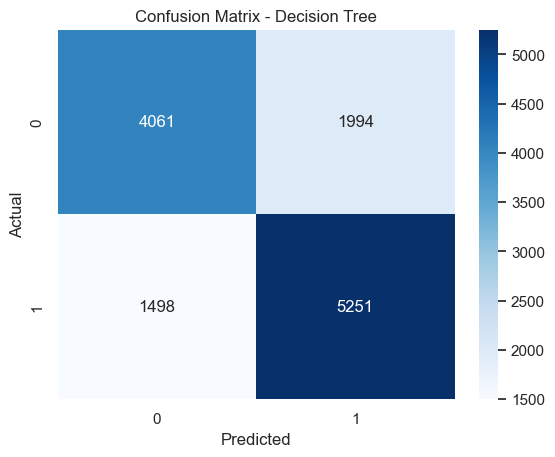

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.73      0.67      0.70      6055
    Diabetes       0.72      0.78      0.75      6749

    accuracy                           0.73     12804
   macro avg       0.73      0.72      0.72     12804
weighted avg       0.73      0.73      0.73     12804

Model: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7391, Precision: 0.7309, Recall: 0.7992, F1-Score: 0.7635


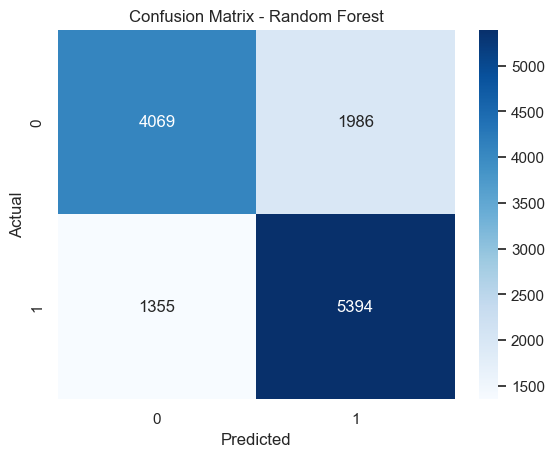

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.75      0.67      0.71      6055
    Diabetes       0.73      0.80      0.76      6749

    accuracy                           0.74     12804
   macro avg       0.74      0.74      0.74     12804
weighted avg       0.74      0.74      0.74     12804

Model: Support Vector Machine
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.7340, Precision: 0.7248, Recall: 0.7985, F1-Score: 0.7599


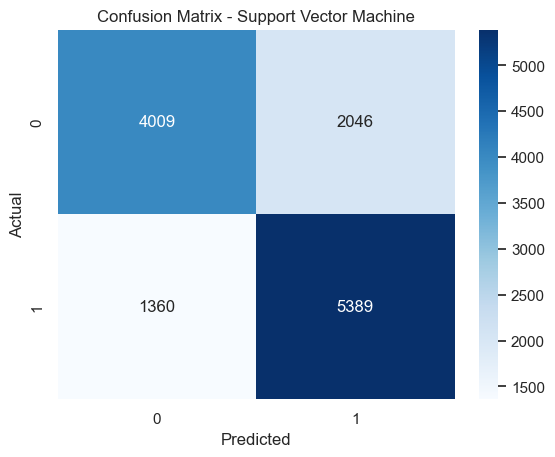

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.75      0.66      0.70      6055
    Diabetes       0.72      0.80      0.76      6749

    accuracy                           0.73     12804
   macro avg       0.74      0.73      0.73     12804
weighted avg       0.74      0.73      0.73     12804

Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.7416, Precision: 0.7338, Recall: 0.8000, F1-Score: 0.7654


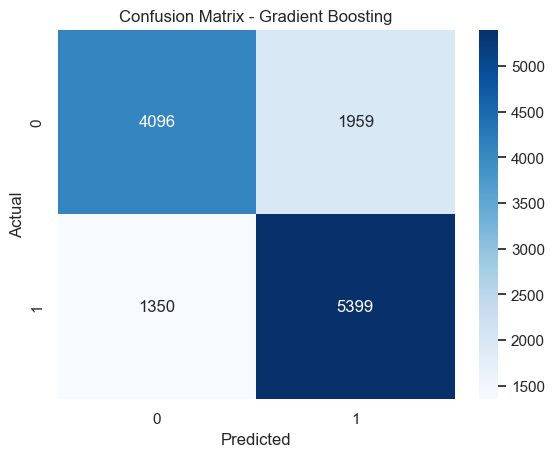

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.75      0.68      0.71      6055
    Diabetes       0.73      0.80      0.77      6749

    accuracy                           0.74     12804
   macro avg       0.74      0.74      0.74     12804
weighted avg       0.74      0.74      0.74     12804



2023-08-13 06:43:14,637 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:49606', name: 3, status: running, memory: 0, processing: 0>
2023-08-13 06:43:14,716 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:49612', name: 0, status: running, memory: 0, processing: 0>
2023-08-13 06:43:14,873 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:49612'.
2023-08-13 06:43:14,904 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:49606'.


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


#Splitting the data into features (X) and target variable (y)
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#List of models with their parameter grids for hyperparameter tuning
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'Gradient Boosting',
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1],
            'max_depth': [3, 5, 10]
        }
    }
]

#Evaluate and tune each model
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("=" * 40)
    
    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
    print("Classification Report:")
    print(report)
    print("=" * 40)

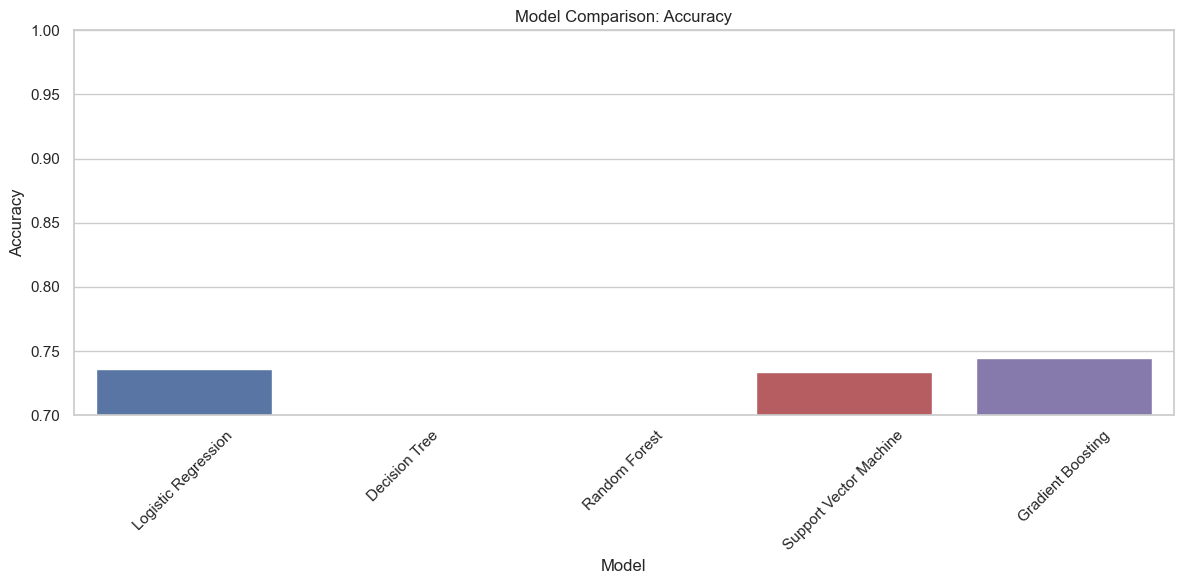

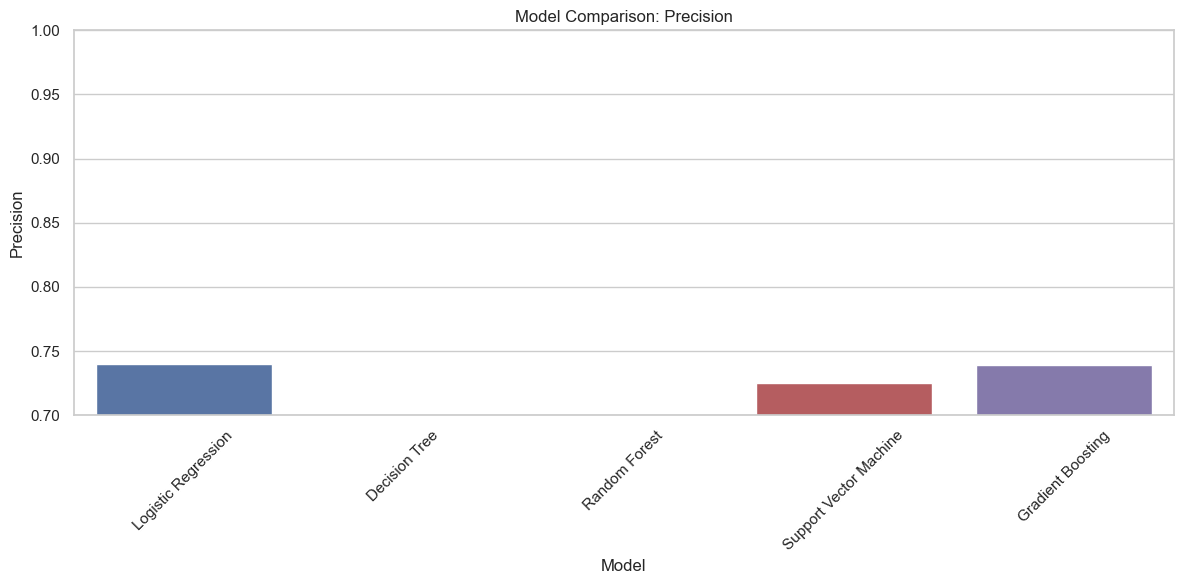

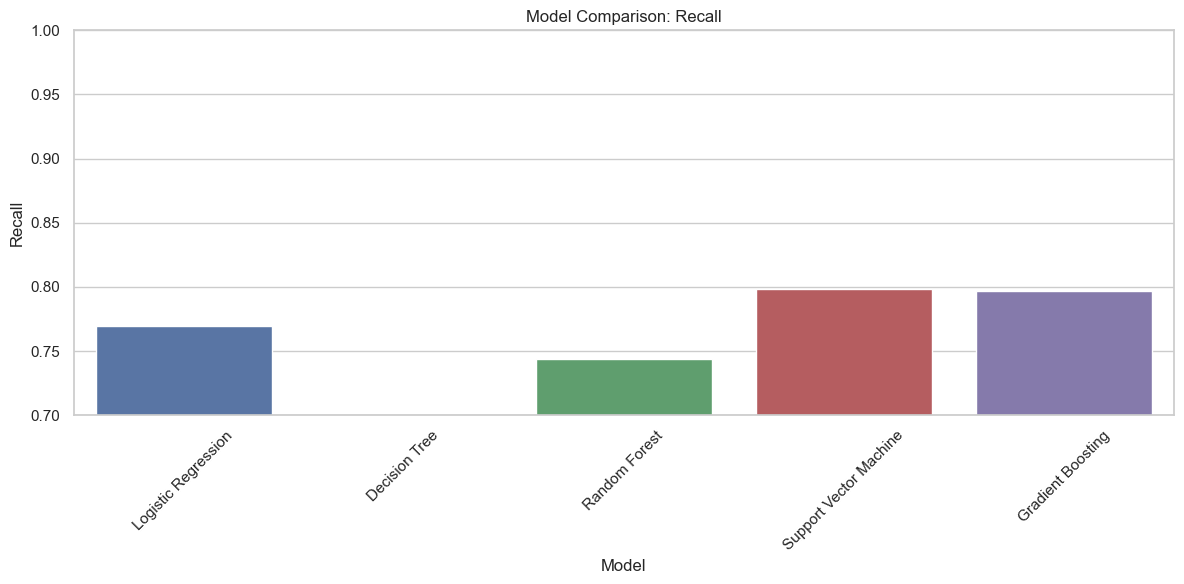

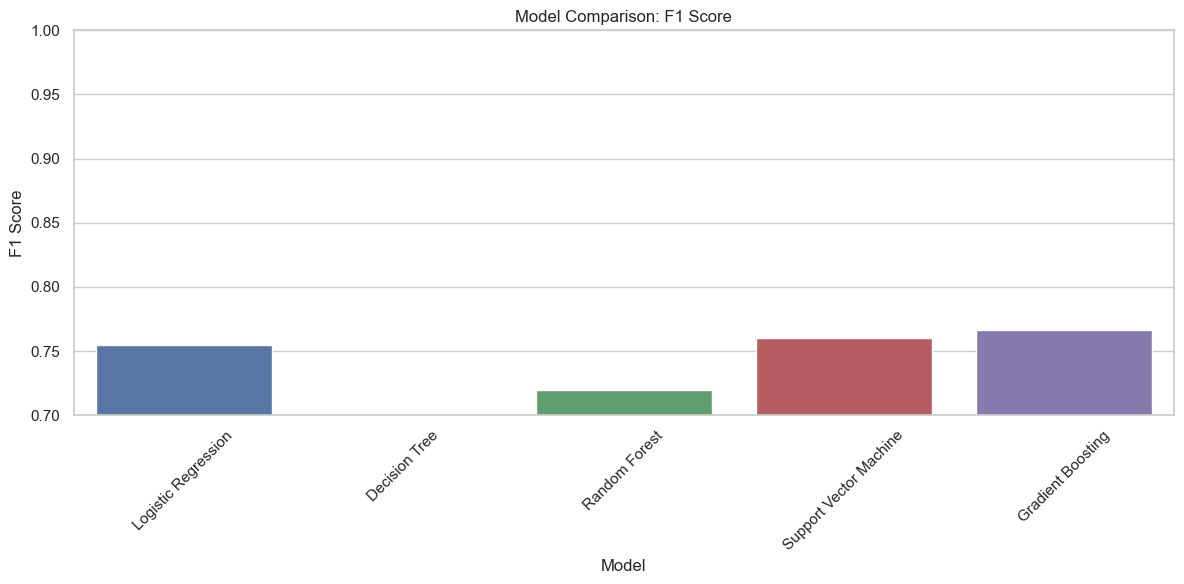

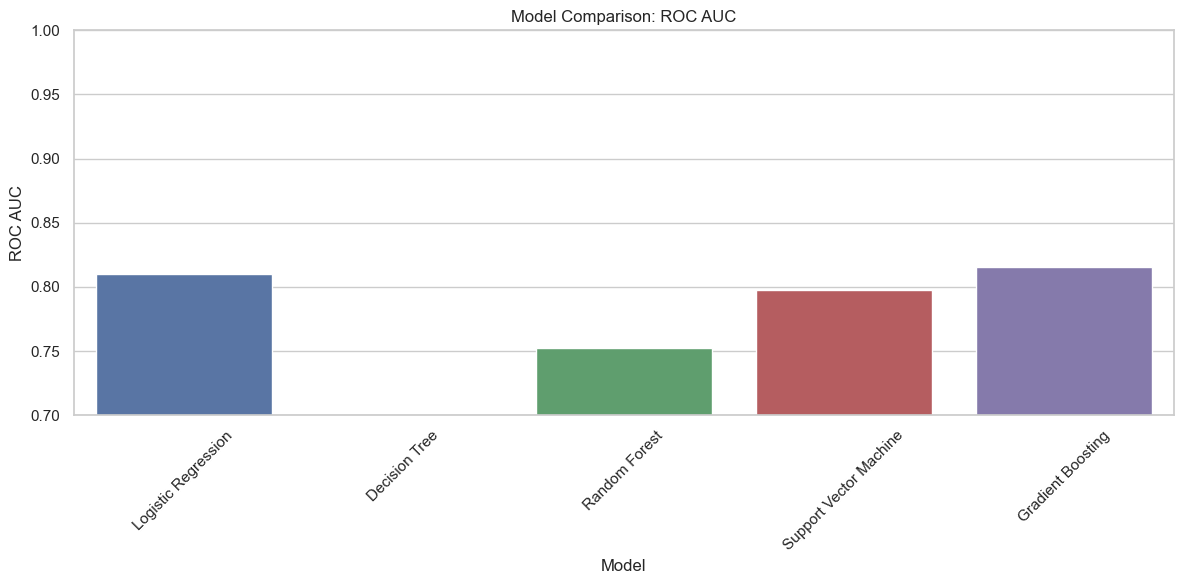

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cleaned_file_path = "diabetes_data_new.csv"
df = pd.read_csv(cleaned_file_path)

#Splitting the data into features (X) and target variable (y)
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training models
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)

#List of models
models = [logreg_model, decision_tree_model, random_forest_model, svm_model, gradient_boosting_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Gradient Boosting']

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
for model in models:
    y_pred = model.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

#DataFrame to store the metric scores
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
})


#comparison results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Model', y='Accuracy')
plt.title("Model Comparison: Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Model', y='Precision')
plt.title("Model Comparison: Precision")
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Model', y='Recall')
plt.title("Model Comparison: Recall")
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Model', y='F1 Score')
plt.title("Model Comparison: F1 Score")
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Model', y='ROC AUC')
plt.title("Model Comparison: ROC AUC")
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)

svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_scaled, y_train)

# Evaluation on the test set
models = [logreg_model, decision_tree_model, random_forest_model, svm_model, gradient_boosting_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Gradient Boosting']

evaluation_results = []

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    evaluation_results.append([model_name, accuracy, precision, recall, f1, roc_auc])

# Convert results to a DataFrame
evaluation_df = pd.DataFrame(evaluation_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])


print(evaluation_df)

                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0     Logistic Regression  0.736254   0.740171  0.769892  0.754739  0.809768
1           Decision Tree  0.621446   0.647671  0.618017  0.632497  0.622842
2           Random Forest  0.694939   0.698008  0.742480  0.719558  0.752460
3  Support Vector Machine  0.733989   0.724815  0.798489  0.759870  0.797264
4       Gradient Boosting  0.744455   0.738969  0.796562  0.766686  0.815679


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Load the cleaned dataset
cleaned_file_path = "diabetes_data_new.csv"
df = pd.read_csv(cleaned_file_path)

# Splitting the data into features (X) and target variable (y)
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the evaluate_model function
def evaluate_model(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    roc_auc = roc_auc_score(true_labels, predicted_labels)
    
    evaluation_results = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
    
    return evaluation_results

# List of models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    GradientBoostingClassifier()
]

model_names = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'Support Vector Machine',
    'Gradient Boosting'
]

# Initialize lists to store metric scores
evaluation_results = []

# Perform cross-validation and evaluate each model
for model, model_name in zip(models, model_names):
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    model_evaluation = evaluate_model(y_test, predictions)
    model_evaluation['Model'] = model_name
    evaluation_results.append(model_evaluation)

# Display the evaluation results
evaluation_df = pd.DataFrame(evaluation_results)
print(evaluation_df)

   Accuracy  Precision    Recall  F1 Score   ROC AUC                   Model
0  0.736254   0.740171  0.769892  0.754739  0.734327     Logistic Regression
1  0.623165   0.649333  0.619796  0.634220  0.623358           Decision Tree
2  0.694236   0.696915  0.743073  0.719254  0.691437           Random Forest
3  0.733989   0.724815  0.798489  0.759870  0.730293  Support Vector Machine
4  0.744455   0.738969  0.796562  0.766686  0.741469       Gradient Boosting


In [71]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Initialize the Gradient Boosting model with example hyperparameters
final_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features="auto",
    random_state=42
)

# Train the model on the entire training dataset
final_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test dataset
final_predictions = final_model.predict(X_test_scaled)
final_evaluation = evaluate_model(y_test, final_predictions)
print("Final Model Performance Metrics:")
print(final_evaluation)

# Preprocess the new data
new_data_scaled = scaler.transform(new_data[columns_to_scale])  # Apply scaling only to selected columns

# Make predictions using the finalized model
predictions = final_model.predict(new_data_scaled)

# Print the predictions or use them as needed
print(predictions)

# Save the final model if desired
joblib.dump(final_model, "final_model.pkl")

Final Model Performance Metrics:
{'Accuracy': 0.7444548578569197, 'Precision': 0.7389690721649484, 'Recall': 0.796562453696844, 'F1 Score': 0.7666856816885339, 'ROC AUC': 0.7414686752381826}
[0. 1. 0. ... 1. 1. 1.]


['final_model.pkl']

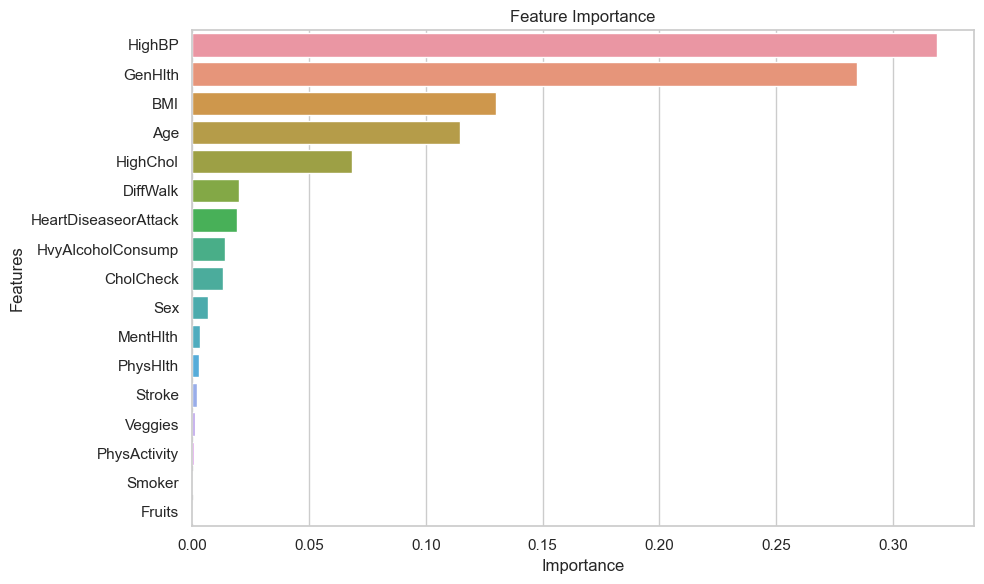

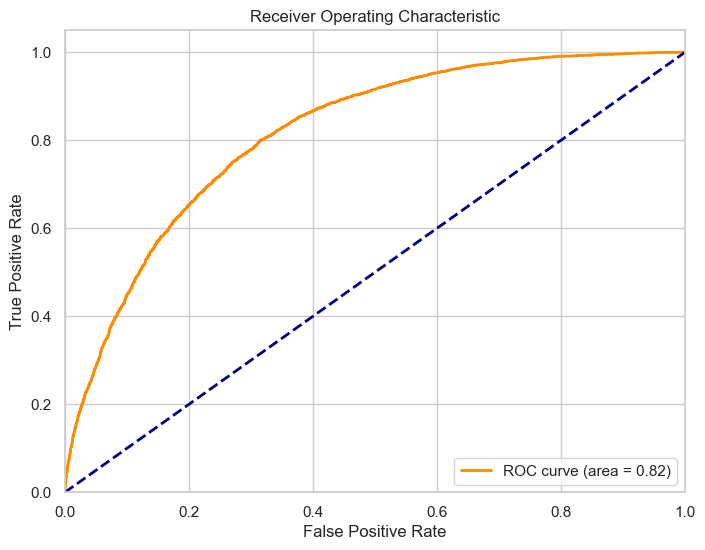

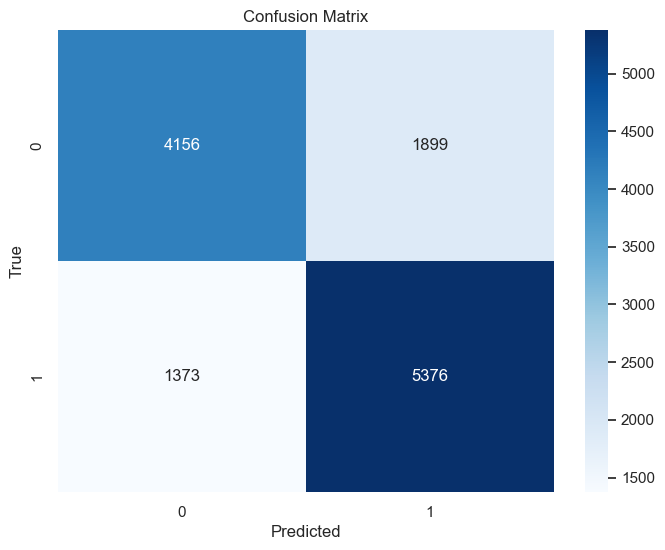

2023-08-13 12:29:27,545 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:49607', name: 2, status: running, memory: 0, processing: 0>
2023-08-13 12:29:27,671 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:49607'.


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.calibration import calibration_curve

# Feature Importance Plot
feature_importances = final_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ROC Curve
y_prob = final_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
